## Configurações gerais

In [1]:
## coloque os outros códigos antes...

# https://neptune.ai/blog/google-colab-dealing-with-files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib==3.5.3
!pip install docxtpl
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Cm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preparação do banco de dados

In [2]:
planilha = pd.read_excel("/content/drive/My Drive/CNJ-mortes/df_final_ajust.xlsx")

In [3]:
indexes_para_remover = []
for idx in planilha.index:
  if planilha.iloc[idx]["5 - É caso de interesse?"] != "sim: morte interna" and planilha.iloc[idx]["5 - É caso de interesse?"] != "sim: morte externa":
    indexes_para_remover.append(idx)

planilha_filtrada = planilha.drop(labels=indexes_para_remover)

## Criação de variáveis

### Duração do processo

In [48]:
dict_infos = {"sem informações": 0, "não se aplica": 0, "com informações": 0}

arr_duracao = []

for idx in planilha_filtrada["4 - Data da distribuição (colocar 010101 - para casos \"sem informações\")"].index:
  line1 = planilha_filtrada.at[idx, "4 - Data da distribuição (colocar 010101 - para casos \"sem informações\")"]
  line2 = planilha_filtrada.at[idx, "44 - Data da informação da morte no  processo judicial (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"]
  
  if type(line1) == str or type(line2) == str:
    if "01" in str(line1):
      dict_infos["sem informações"] += 1
    if "01" in str(line2):
      dict_infos["sem informações"] += 1
    if "02" in str(line2):
      dict_infos["não se aplica"] += 1
    arr_duracao.append(None)
    continue
  
  if pd.isnull(line1) or pd.isnull(line2):
    arr_duracao.append(None)
    continue

  arr_duracao.append((pd.to_datetime(line2, format="%Y-%m-%M") - pd.to_datetime(line1, format="%Y-%m-%M")).days)
  dict_infos["com informações"] += 1

# print(len(arr_duracao))
planilha_filtrada["Duração do processo"] = arr_duracao

df_dict_infos_duracao_processo = pd.DataFrame.from_dict([dict_infos])
df_dict_infos_duracao_processo.rename(index = {0: "quantidade"}, inplace = True)

### Tempo de investigação da morte

In [40]:
arr_tempo_investigacao_morte = []
dict_infos = {"sem informações_começo": 0,"sem informações_final": 0, "não se aplica": 0, "com informações":0}
for idx in planilha_filtrada["65 - Começo da investigação (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"].index:
  line1 = planilha_filtrada.at[idx, "65 - Começo da investigação (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"]
  line2 = planilha_filtrada.at[idx, "66 - Data do fim da investigação (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"]
  # print(line1)
  # print(line2)
 

  if type(line1)==str or type(line2)==str:
    # print("é string")
    # z= input("")
    if "01" in str(line1):
      dict_infos["sem informações_começo"] += 1
    if "01" in str(line2):
      dict_infos["sem informações_final"] += 1
    if "02" in str(line1):
      dict_infos["não se aplica"] += 1
    if "02" in str(line2):
      dict_infos["não se aplica"] += 1
    arr_tempo_investigacao_morte.append(None)

    continue
  
  if pd.isnull(line1) or pd.isnull(line2):
    arr_tempo_investigacao_morte.append(None)
    continue
  
  arr_tempo_investigacao_morte.append((pd.to_datetime(line2, format="%Y-%m-%M") - pd.to_datetime(line1, format="%Y-%m-%M")).days)
  dict_infos["com informações"] += 1

planilha_filtrada["Tempo de investigação da morte"] = arr_tempo_investigacao_morte

df_dict_infos_tp_invest_morte = pd.DataFrame.from_dict([dict_infos])
df_dict_infos_tp_invest_morte.rename(index = {0: "quantidade"}, inplace = True)

### Tempo para informar morte no processo

In [53]:
arr_tempo_morte_processo = []
dict_infos = {"sem informações": 0, "não se aplica": 0, "com informações":0}
for idx in planilha_filtrada["43 - Data da morte"].index:
  line1 = planilha_filtrada.at[idx, "43 - Data da morte"]
  line2 = planilha_filtrada.at[idx, "44 - Data da informação da morte no  processo judicial (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"]

  if type(line1)==str or type(line2)==str:
    if "01" in str(line1):
      dict_infos["sem informações"] += 1
    if "01" in str(line2):
      dict_infos["sem informações"] += 1
    if "02" in str(line1):
      dict_infos["não se aplica"] += 1
    if "02" in str(line2):
      dict_infos["não se aplica"] += 1
    arr_tempo_morte_processo.append(None)

    continue
  
  if pd.isnull(line1) or pd.isnull(line2):
    arr_tempo_morte_processo.append(None)
    continue
  
  arr_tempo_morte_processo.append((pd.to_datetime(line2, format="%Y-%m-%M") - pd.to_datetime(line1, format="%Y-%m-%M")).days)
  dict_infos["com informações"] += 1

planilha_filtrada["Tempo para informar morte no processo"] = arr_tempo_morte_processo
df_dict_infos_tp_inform_morte = pd.DataFrame.from_dict([dict_infos])
df_dict_infos_tp_inform_morte.rename(index = {0: "quantidade"}, inplace = True)

### Tempo para declaração da extinção da punibilidade

In [60]:
arr_tempo_fim_declaracao = []
dict_infos = {"sem informações": 0, "não se aplica": 0, "com informações":0}
for idx in planilha_filtrada["43 - Data da morte"].index:
  line1 = planilha_filtrada.at[idx, "43 - Data da morte"]
  line2 = planilha_filtrada.at[idx, "45 - Data da decisão que extinguiu a punibilidade com base na morte (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"]

  if type(line1)==str or type(line2)==str:
    if "01" in str(line1):
      dict_infos["sem informações"] += 1
    if "01" in str(line2):
      dict_infos["sem informações"] += 1
    if "02" in str(line1):
      dict_infos["não se aplica"] += 1
    if "02" in str(line2):
      dict_infos["não se aplica"] += 1
    arr_tempo_fim_declaracao.append(None)

    continue
  
  if pd.isnull(line1) or pd.isnull(line2):
    arr_tempo_fim_declaracao.append(None)
    continue
  
  arr_tempo_fim_declaracao.append((pd.to_datetime(line2, format="%Y-%m-%M") - pd.to_datetime(line1, format="%Y-%m-%M")).days)
  dict_infos["com informações"] += 1

planilha_filtrada["Tempo para declaração de extinção"] = arr_tempo_fim_declaracao

df_dict_infos_tp_decl_ext = pd.DataFrame.from_dict([dict_infos])
df_dict_infos_tp_decl_ext.rename(index = {0: "quantidade"}, inplace = True)

### Quantidade de documentos

In [65]:
arr_qtd_docs = []
dict_grupos_docs = {}
for line in planilha_filtrada["74 - Documentos referentes à morte juntados aos autos (listar e separar por ponto e vírgula ( \";\")"]:
  if pd.isnull(line):
    arr_qtd_docs.append(None)
    continue

  if ";" not in line:
    arr_qtd_docs.append(1)
    doc_sanitizado = line.strip().lower()
    if doc_sanitizado == "":
      continue
    if doc_sanitizado not in dict_grupos_docs.keys():
      dict_grupos_docs[doc_sanitizado] = 1
    else:
      dict_grupos_docs[doc_sanitizado] += 1
  else:
    docs = line.split(";")
    arr_qtd_docs.append(len(docs))
    for doc in docs:
      doc_sanitizado = doc.strip().lower()
      if doc_sanitizado == "":
        continue
      if doc_sanitizado not in dict_grupos_docs.keys():
        dict_grupos_docs[doc_sanitizado] = 1
      else:
        dict_grupos_docs[doc_sanitizado] += 1
  
planilha_filtrada["Quantidade de documentos"] = arr_qtd_docs

### Quantidade de óbitos no processo

In [9]:
# planilha_filtrada["Quantidade de óbitos no processo"] = planilha_filtrada['7 - Quantas pessoas estão respondendo pelo mesmo processo?'] - planilha_filtrada['8 - Quantas pessoas que respondiam ao processo faleceram (considerando as informações do processo)?']

## Filtra planilhas

In [32]:
# print(len(planilha_filtrada))

planilha_filtrada_interna = planilha_filtrada[planilha_filtrada["5 - É caso de interesse?"] == "sim: morte interna"]
# print(len(planilha_filtrada_interna))
planilha_filtrada_externa = planilha_filtrada[planilha_filtrada["5 - É caso de interesse?"] == "sim: morte externa"]
# print(len(planilha_filtrada_externa))

## Funções de uso geral

In [11]:
import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [12]:
def combine(counts, percentages):
    fmt = ' {:.2f}% ({})'.format
    return [fmt(p, c) for c, p in zip(counts, percentages)]

In [20]:
def gera_grafico_geral(variavel, planilha_filtrada, titulo="Media e Medianas Gerais", cor="#ba2e2e", eixo_y=(200, 1400, 200), fonttamanho=17, fonttitulo=20, fontlabel=15, x=22, y=10):
  # print(f'Número total de registros vazios: {planilha_filtrada[variavel].isna().sum()}')

  plt.style.use(['ggplot'])
  fig, ax = plt.subplots(figsize=(x,y))
  fig.suptitle(titulo, fontsize=fonttitulo)

  geral_absolute = planilha_filtrada[variavel].value_counts()
  geral_relative = planilha_filtrada[variavel].value_counts(normalize=True)*100
  if geral_relative.size != 0:
    # ax.xticks(range(eixo_y[0], eixo_y[1], eixo_y[2]))
    geral_relative_plt = geral_relative.plot(ax=ax, kind='barh', color=[cor], fontsize=fonttamanho, edgecolor="black")
    ax.bar_label(ax.containers[0], labels=combine(geral_absolute, geral_relative), fontsize=fontlabel)
    plt.xticks(range(eixo_y[0], eixo_y[1], eixo_y[2]))

  return (plt, fig)

def gera_grafico_geral_media(variavel, planilha_filtrada, titulo="Media e Medianas Gerais", cor="#ba2e2e", eixo_y=(200, 1400, 200), fonttamanho=17, fonttitulo=20, fontlabel=15, x=22, y=10):
  # Geral

  media_geral = planilha_filtrada[variavel].mean()
  print(f'Média: {media_geral}')

  mediana_geral = planilha_filtrada[variavel].median()
  print(f'Mediana: {mediana_geral}')
  
  dict_infos_gerais = {"Média": float("{:.2f}".format(media_geral)), "Mediana": float("{:.2f}".format(mediana_geral))}
  # print(dict_infos_gerais)

  series_dict_infos_geral = pd.Series(dict_infos_gerais)
  
  plt.style.use(['ggplot'])
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(x,y))
  ax.set_title(titulo, fontsize=fonttitulo)
  series_dict_infos_geral.plot(ax=ax, kind='barh', color=[cor], fontsize=fonttamanho, edgecolor="black")
  ax.bar_label(ax.containers[0], labels=[' {:.2f}'.format(media_geral), ' {:.2f}'.format(mediana_geral)], fontsize=fontlabel)
  plt.xticks(range(eixo_y[0], eixo_y[1], eixo_y[2]))

  return (plt, fig)

## Parte 6

### Duração do processo

([<matplotlib.axis.XTick at 0x7fc5ad94bb20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

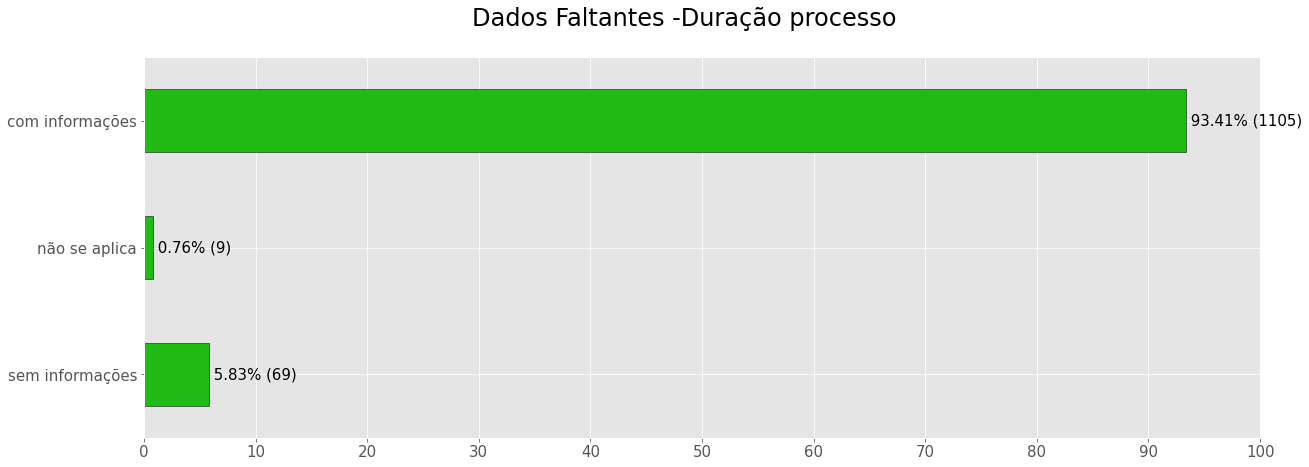

In [51]:
df_dict_infos = df_dict_infos_duracao_processo.T
# print(df_dict_infos)
df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(20,7))
fig.suptitle("Dados Faltantes -Duração processo", fontsize=24)
df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#20ba14'], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# plt.ylabel(None)
plt.xticks(range(0, 110, 10))

Média: 881.425925925926
Mediana: 493.0


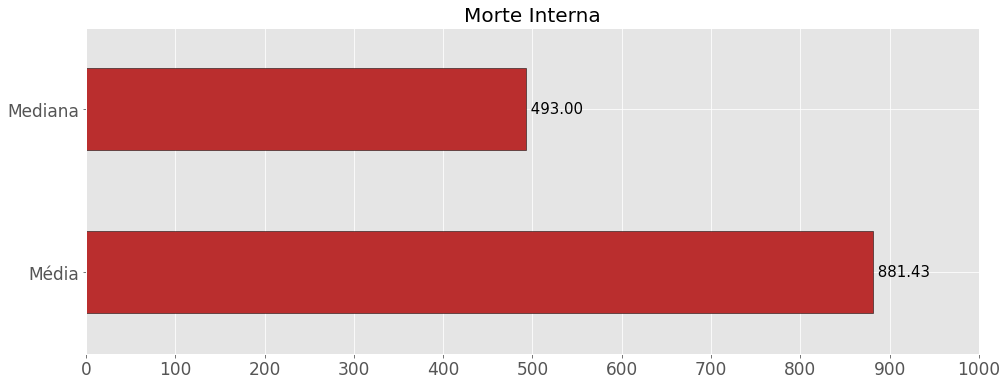

In [21]:
plot, fig = gera_grafico_geral_media("Duração do processo", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 1100, 100))

# loc_geral_variavel_duracao_processo_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_duracao_processo_caso_interna.png"
# fig.savefig(loc_geral_variavel_duracao_processo_1_6)

Média: 644.8776328986961
Mediana: 497.0


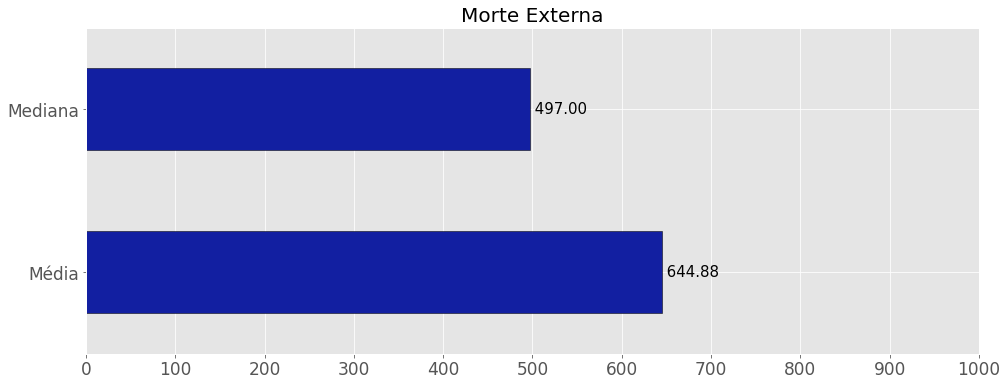

In [22]:
plot, fig = gera_grafico_geral_media("Duração do processo", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 1100, 100))

# loc_geral_variavel_duracao_processo_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_duracao_processo_caso_externa.png"
# fig.savefig(loc_geral_variavel_duracao_processo_2_6)

### Tempo de investigação da morte

([<matplotlib.axis.XTick at 0x7fc5ad3e54c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

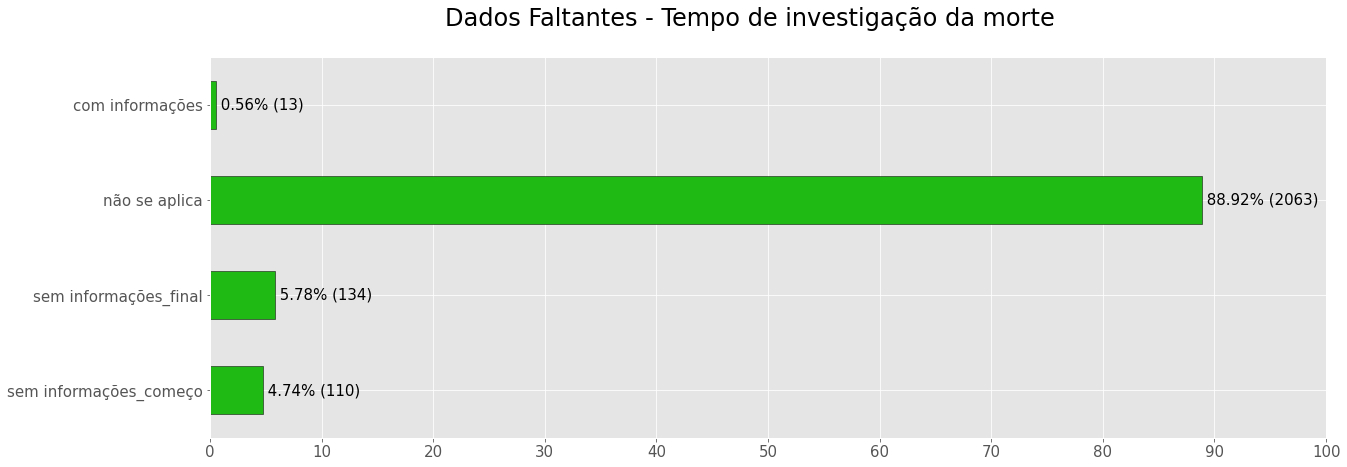

In [52]:
# df_dict_infos_tp_invest_morte

df_dict_infos = df_dict_infos_tp_invest_morte.T
# print(df_dict_infos)
df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(20,7))
fig.suptitle("Dados Faltantes - Tempo de investigação da morte", fontsize=24)
df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#20ba14'], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# plt.ylabel(None)
plt.xticks(range(0, 110, 10))

Média: 111.0
Mediana: 111.0


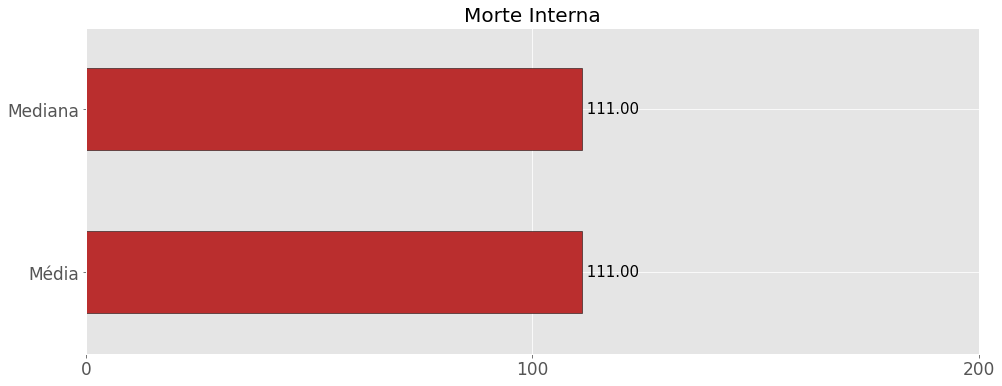

In [55]:
plot, fig = gera_grafico_geral_media("Tempo de investigação da morte", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0,300,100))

# loc_geral_variavel_tempo_investigacao_morte_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_tempo_investigacao_morte_caso_interna.png"
# fig.savefig(loc_geral_variavel_tempo_investigacao_morte_1_6)

Média: 80.0
Mediana: 80.0


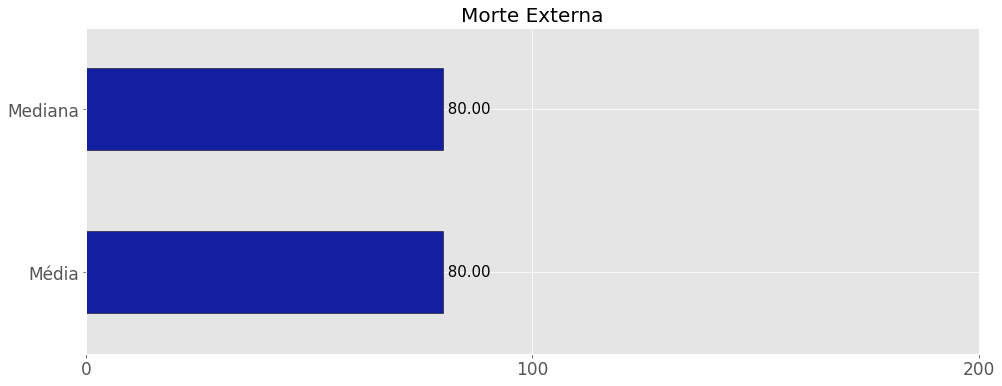

In [42]:
plot, fig = gera_grafico_geral_media("Tempo de investigação da morte", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0,300,100))

# loc_geral_variavel_tempo_investigacao_morte_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_tempo_investigacao_morte_caso_externa.png"
# fig.savefig(loc_geral_variavel_tempo_investigacao_morte_2_6)

### Tempo para informar morte no processo

([<matplotlib.axis.XTick at 0x7fc5a965be50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

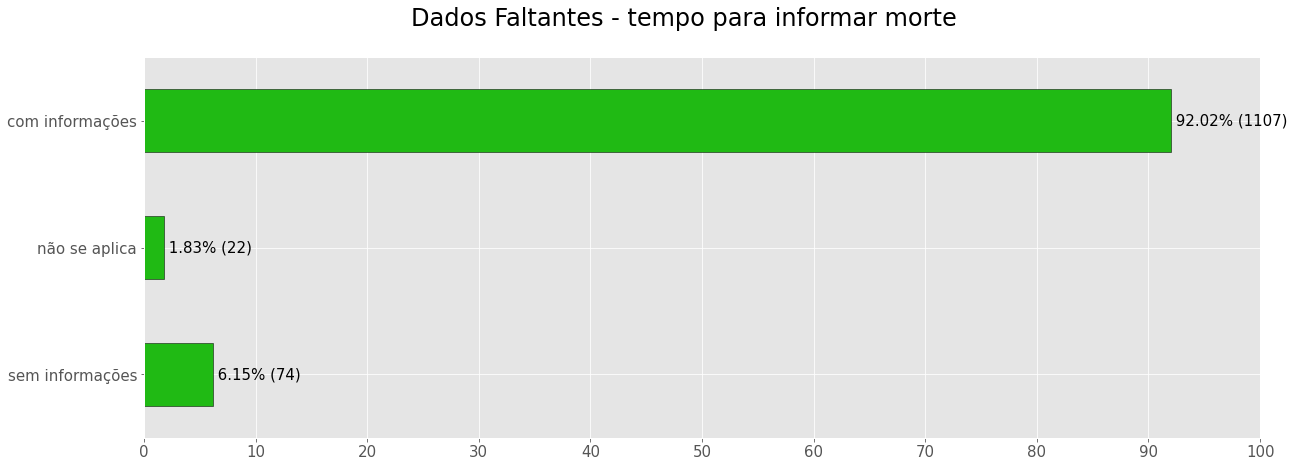

In [59]:
df_dict_infos = df_dict_infos_tp_inform_morte.T
# print(df_dict_infos)
df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(20,7))
fig.suptitle("Dados Faltantes - tempo para informar morte", fontsize=24)
df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#20ba14'], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# plt.ylabel(None)
plt.xticks(range(0, 110, 10))


Média: 108.51851851851852
Mediana: 14.0


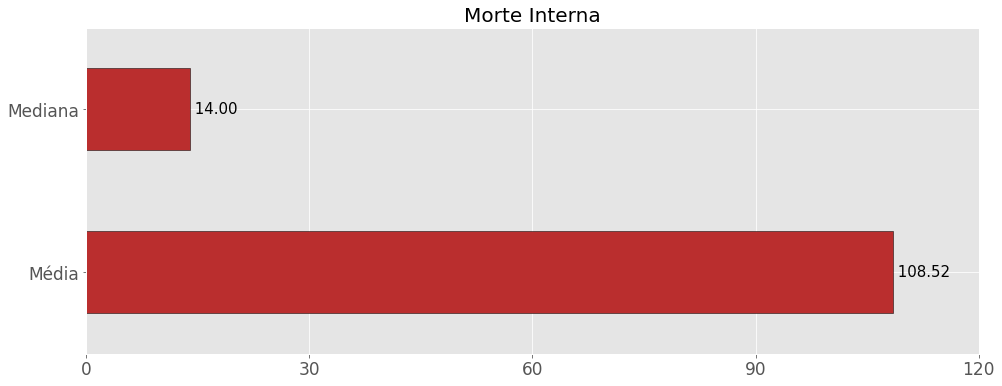

In [57]:
plot, fig = gera_grafico_geral_media("Tempo para informar morte no processo", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 150, 30))

# loc_geral_variavel_tempo_informar_morte_processo_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_tempo_informar_morte_processo_caso_interna.png"
# fig.savefig(loc_geral_variavel_tempo_informar_morte_processo_1_6)

Média: 223.5975975975976
Mediana: 90.0


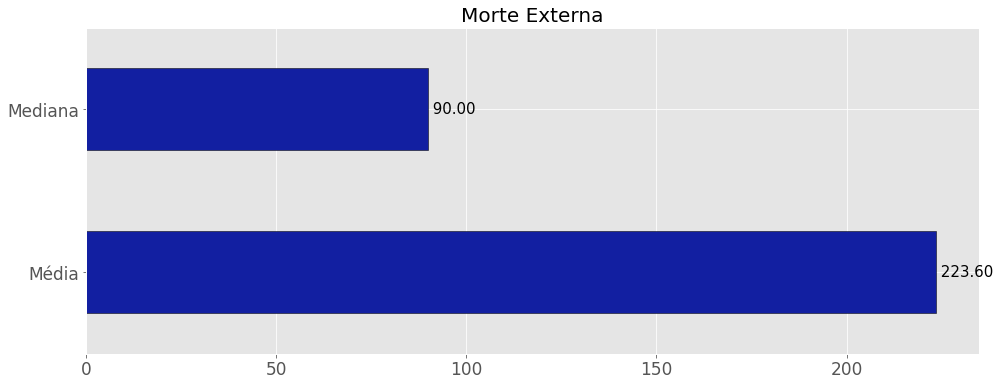

In [58]:
plot, fig = gera_grafico_geral_media("Tempo para informar morte no processo", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 250, 50))

# loc_geral_variavel_tempo_informar_morte_processo_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_tempo_informar_morte_processo_caso_externa.png"
# fig.savefig(loc_geral_variavel_tempo_informar_morte_processo_2_6)

### Tempo para declaração da extinção da punibilidade

([<matplotlib.axis.XTick at 0x7fc5a9622520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

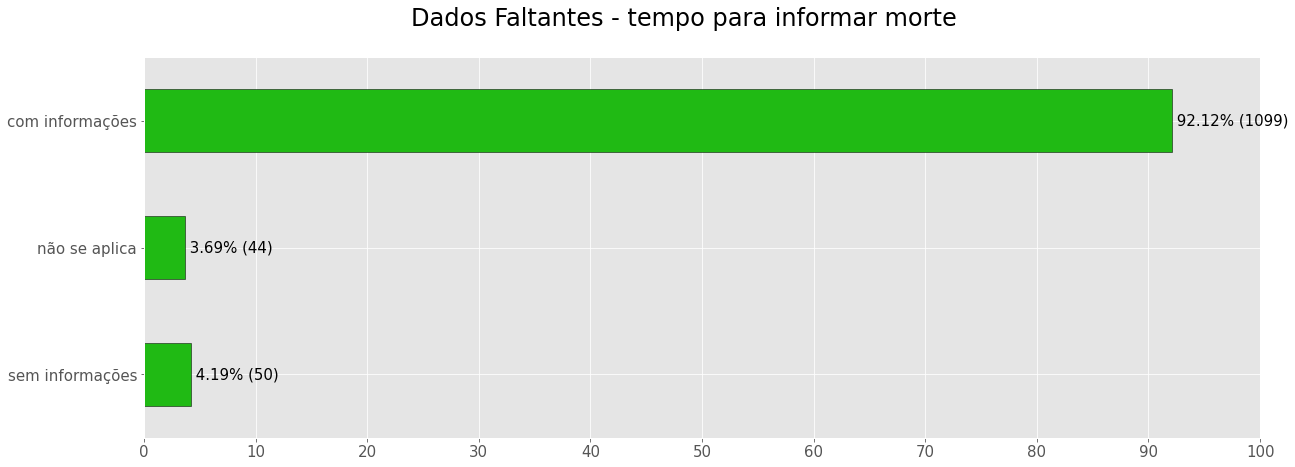

In [61]:
# df_dict_infos_tp_decl_ext

df_dict_infos = df_dict_infos_tp_decl_ext.T
# print(df_dict_infos)
df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(20,7))
fig.suptitle("Dados Faltantes - tempo para informar morte", fontsize=24)
df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#20ba14'], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# plt.ylabel(None)
plt.xticks(range(0, 110, 10))


Média: 251.96296296296296
Mediana: 95.0


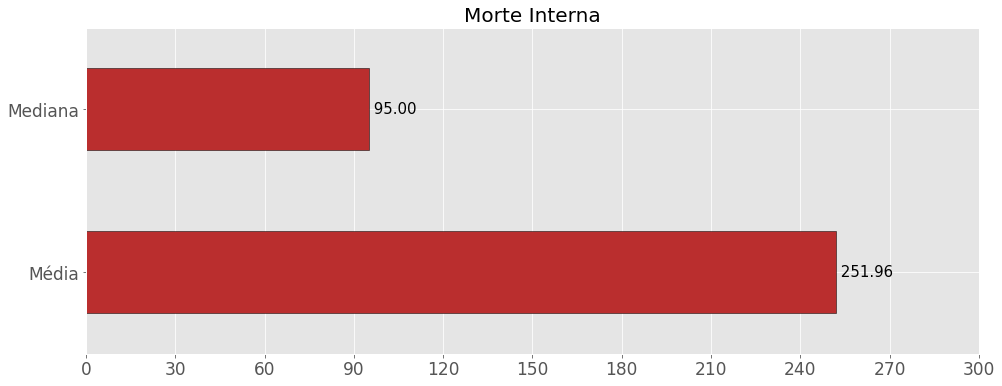

In [63]:
plot, fig = gera_grafico_geral_media("Tempo para declaração de extinção", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0,330,30))

# loc_geral_variavel_tempo_declaracao_extincao_punibilidade_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_tempo_declaracao_extincao_punibilidade_caso_interna.png"
# fig.savefig(loc_geral_variavel_tempo_declaracao_extincao_punibilidade_1_6)

Média: 345.25731584258324
Mediana: 203.0


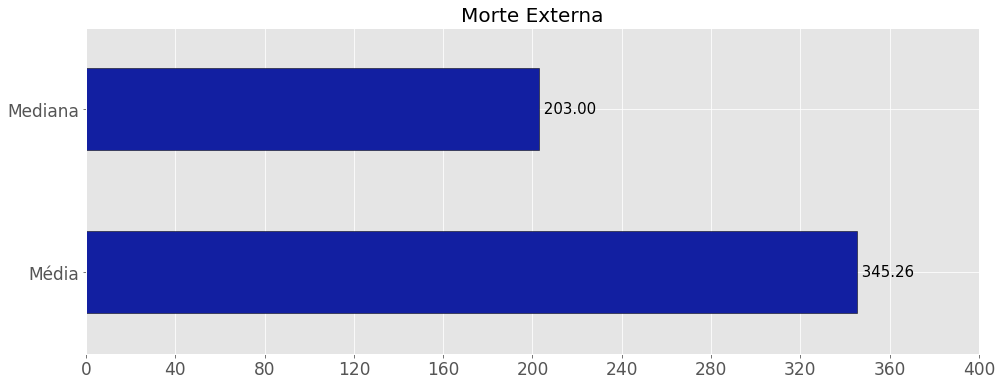

In [64]:
plot, fig = gera_grafico_geral_media("Tempo para declaração de extinção", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0,440,40))

# loc_geral_variavel_tempo_declaracao_extincao_punibilidade_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_tempo_declaracao_extincao_punibilidade_caso_externa.png"
# fig.savefig(loc_geral_variavel_tempo_declaracao_extincao_punibilidade_2_6)

### Quantidade de documentos

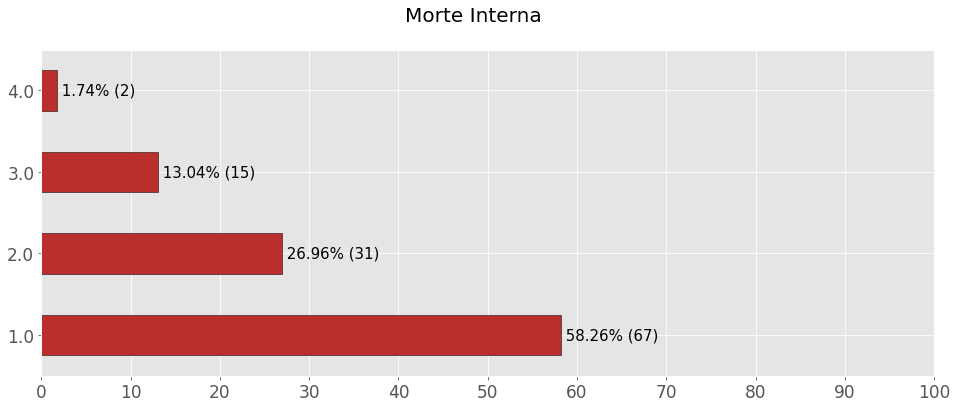

In [67]:
plot, fig = gera_grafico_geral("Quantidade de documentos", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_qtd_docs_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_qtd_docs_caso_interna.png"
# fig.savefig(loc_geral_variavel_qtd_docs_1_6)

   index  quantidade
0    1.0         801
1    2.0         203
2    3.0          32
3    4.0           3
4    6.0           2
5    5.0           1
6    7.0           1


Text(0, 0.5, '')

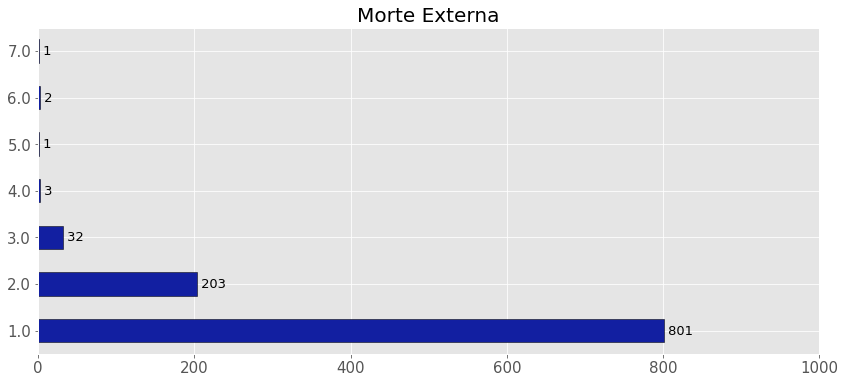

In [72]:
var_27_aux_faixas_renda_externa = planilha_filtrada_externa['Quantidade de documentos'].value_counts().to_frame()
# print(var_27_aux_faixas_renda_externa)

var_27_aux_faixas_renda_externa.rename(columns = {"Quantidade de documentos": "quantidade"}, inplace = True)

# print(var_27_aux_faixas_renda_externa)

# print(var_27_aux_faixas_renda_externa["quantidade"].sum())
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reset_index()
print(var_27_aux_faixas_renda_externa)
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reindex([0,1,2,3,5,4,6])
var_27_aux_faixas_renda_externa.set_index('index', inplace=True)

labels_value_counts_renda_morte_externa = [' {}'.format(i[0]) for i in var_27_aux_faixas_renda_externa.values]
# print(labels_value_counts_renda_morte_externa)

plt.style.use(['ggplot'])
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(14,6))
ax.set_title("Morte Externa", fontsize=20)
var_27_aux_faixas_renda_externa['quantidade'].plot(ax=ax, kind='barh', color=["#121fa1"], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=labels_value_counts_renda_morte_externa, fontsize=13)
plt.xticks(range(0, 1200, 200))
plt.ylabel(None)

### 46 - Há Declaração de Óbito (D.O.) ou Atestado de Óbito?

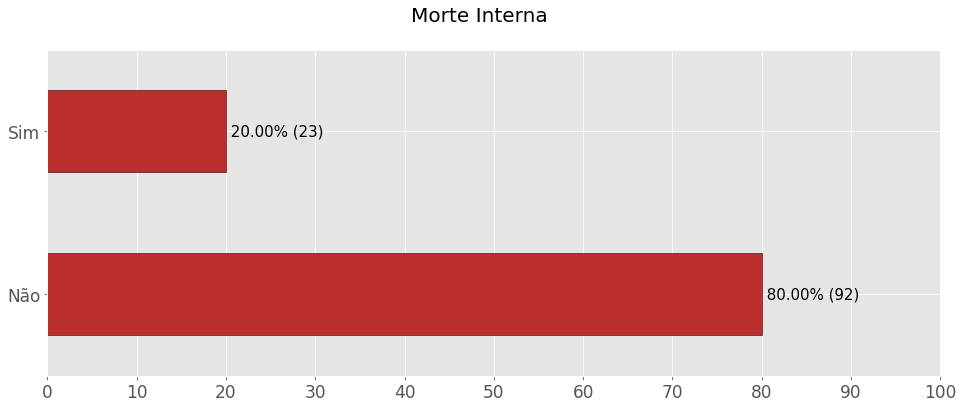

In [73]:
plot, fig = gera_grafico_geral("46 - Há Declaração de Óbito (D.O.) ou Atestado de Óbito?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_46_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_existe_declaracao_ou_atestado_obito_caso_interna.png"
# fig.savefig(loc_geral_variavel_46_1_6)

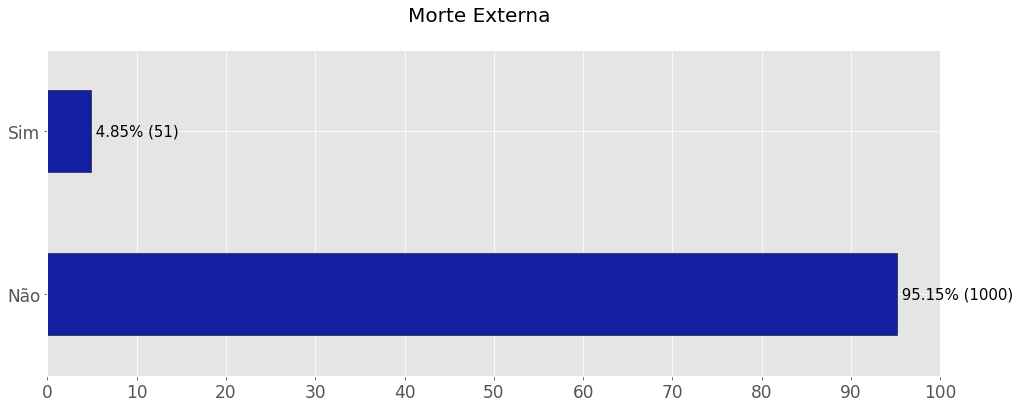

In [74]:
plot, fig = gera_grafico_geral("46 - Há Declaração de Óbito (D.O.) ou Atestado de Óbito?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_46_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_existe_declaracao_ou_atestado_obito_caso_externa.png"
# fig.savefig(loc_geral_variavel_46_2_6)

### 48 - Há certidão de óbito (sim/não)? 

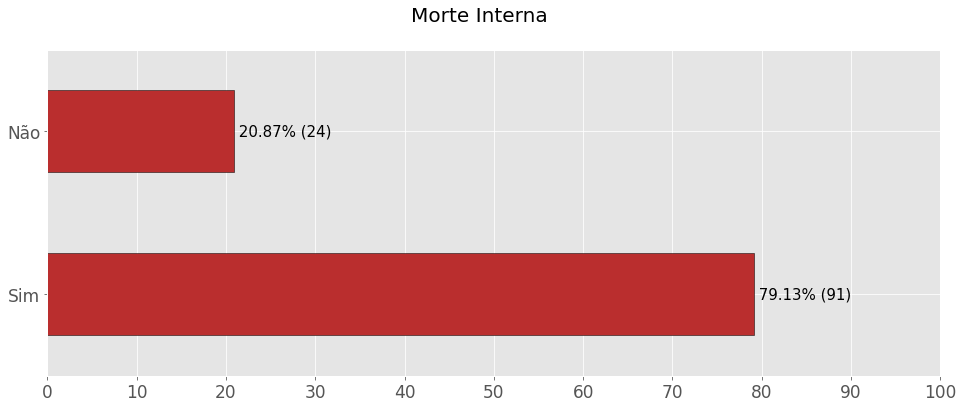

In [ ]:
plot, fig = gera_grafico_geral("48 - Há certidão de óbito (sim/não)? ", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

loc_geral_variavel_48_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_existe_certidao_obito_caso_interna.png"
fig.savefig(loc_geral_variavel_48_1_6)

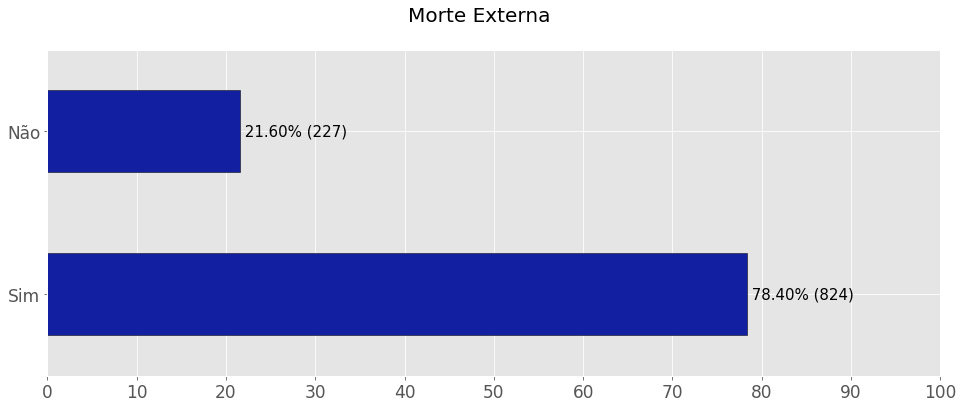

In [ ]:
plot, fig = gera_grafico_geral("48 - Há certidão de óbito (sim/não)? ", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

loc_geral_variavel_48_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_existe_certidao_obito_caso_externa.png"
fig.savefig(loc_geral_variavel_48_2_6)

### 53 - As causas da morte foram identificadas?

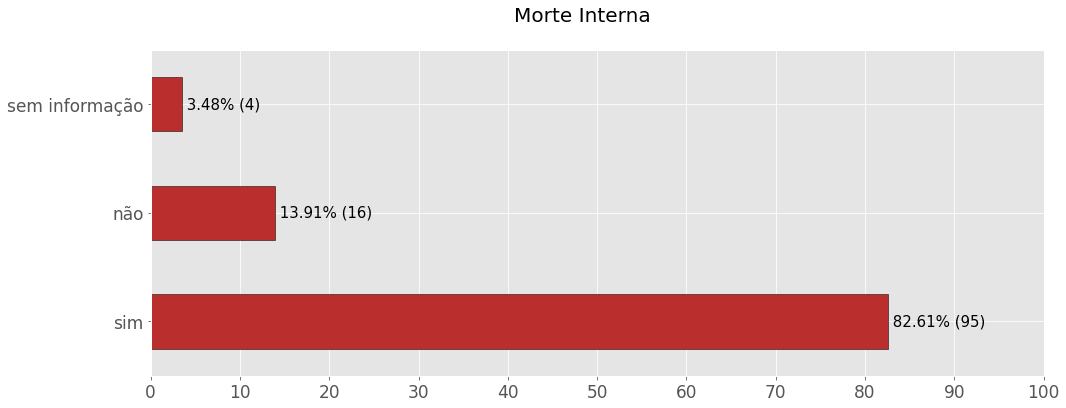

In [76]:
plot, fig = gera_grafico_geral("53 - As causas da morte foram identificadas?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_53_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_causas_morte_identificadas_caso_interna.png"
# fig.savefig(loc_geral_variavel_53_1_6)

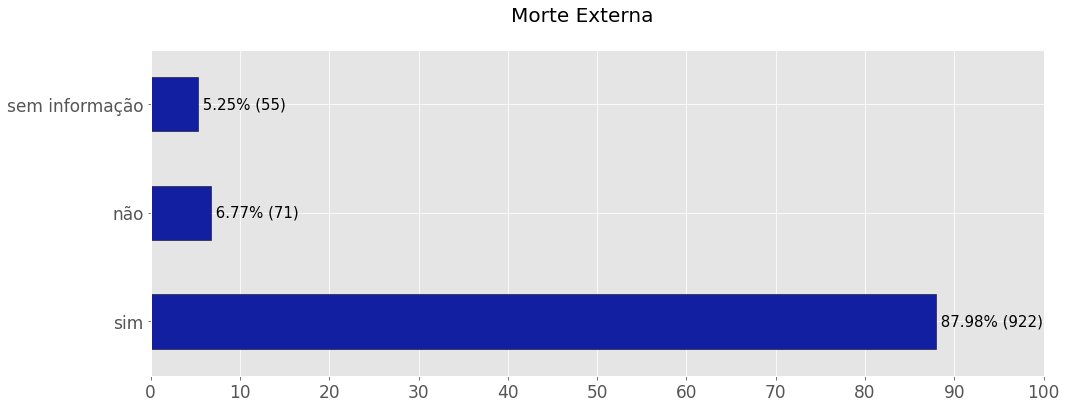

In [77]:
plot, fig = gera_grafico_geral("53 - As causas da morte foram identificadas?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_53_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_causas_morte_identificadas_caso_externa.png"
# fig.savefig(loc_geral_variavel_53_2_6)

### 57 - Há declaração de que a morte foi por Covid-19?

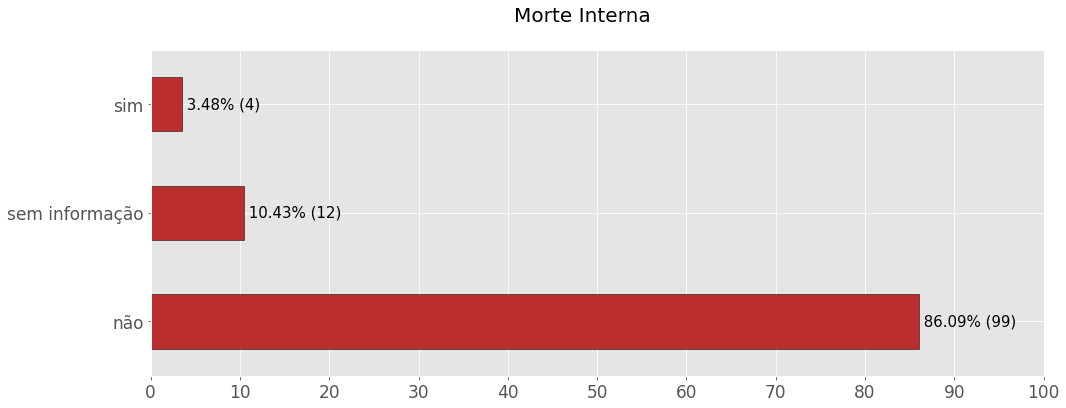

In [79]:
plot, fig = gera_grafico_geral("57 - Há declaração de que a morte foi por Covid-19?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_57_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_declaracao_morte_covid19_caso_interna.png"
# fig.savefig(loc_geral_variavel_57_1_6)

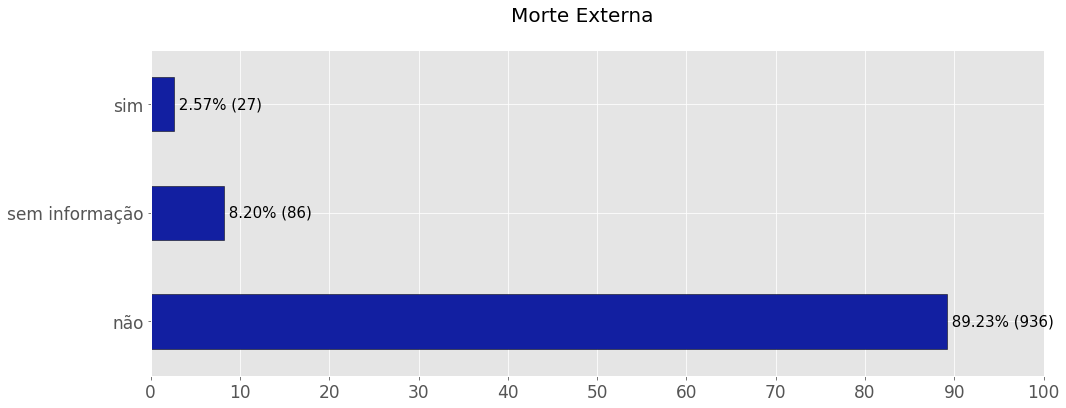

In [81]:
plot, fig = gera_grafico_geral("57 - Há declaração de que a morte foi por Covid-19?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_57_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_declaracao_morte_covid19_caso_externa.png"
# fig.savefig(loc_geral_variavel_57_2_6)

### 58 - Houve HC com base na recomendação 062/2020 (Em caso de morte por covid 19)?

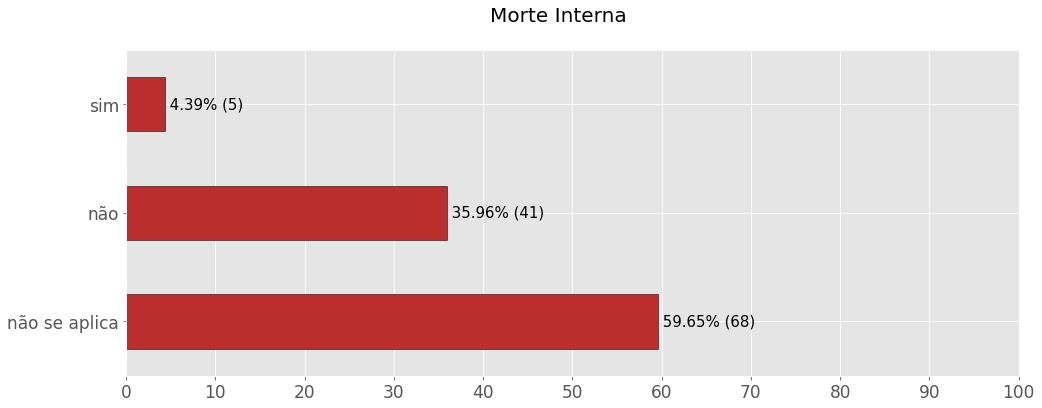

In [82]:
plot, fig = gera_grafico_geral("58 - Houve HC com base na recomendação 062/2020 (Em caso de morte por covid 19)?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_58_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_hc_0622020_caso_interna.png"
# fig.savefig(loc_geral_variavel_58_1_6)

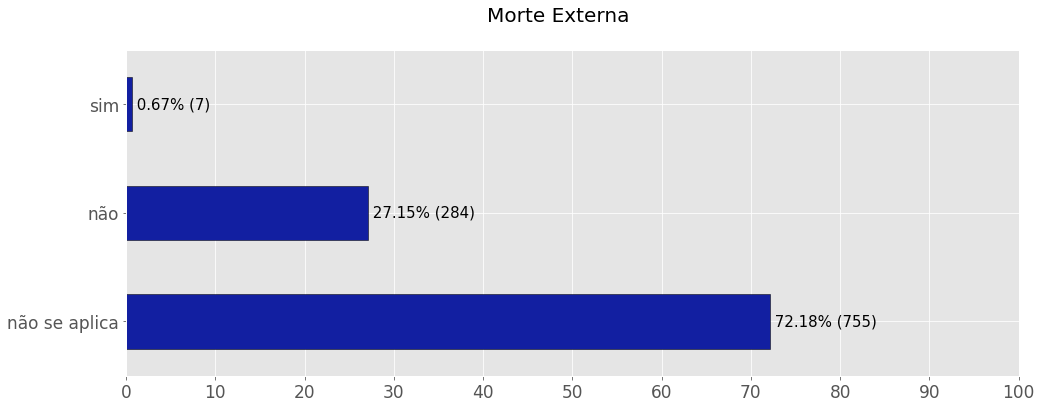

In [83]:
plot, fig = gera_grafico_geral("58 - Houve HC com base na recomendação 062/2020 (Em caso de morte por covid 19)?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_58_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_hc_0622020_caso_externa.png"
# fig.savefig(loc_geral_variavel_58_2_6)

### 59 - A morte ocorreu durante um massacre?

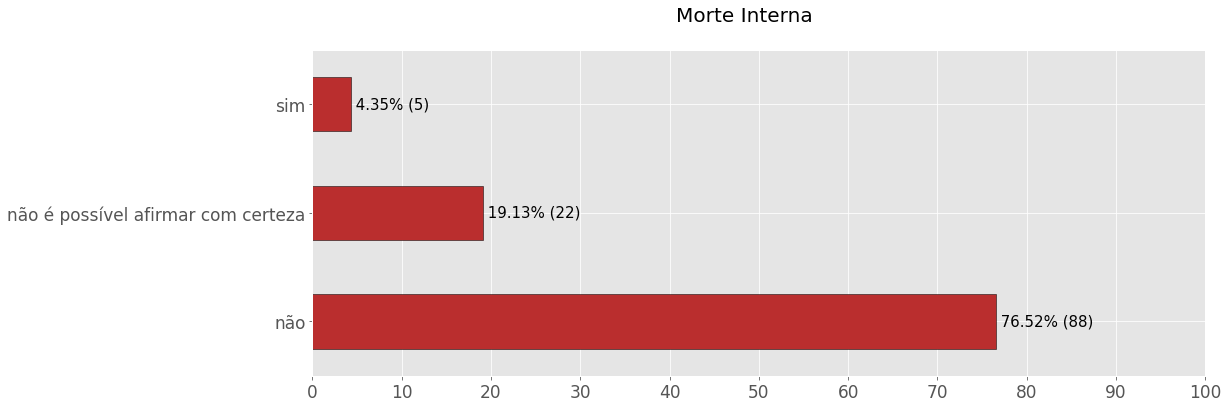

In [84]:
plot, fig = gera_grafico_geral("59 - A morte ocorreu durante um massacre?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_59_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_morte_durante_massacre_caso_interna.png"
# fig.savefig(loc_geral_variavel_59_1_6)

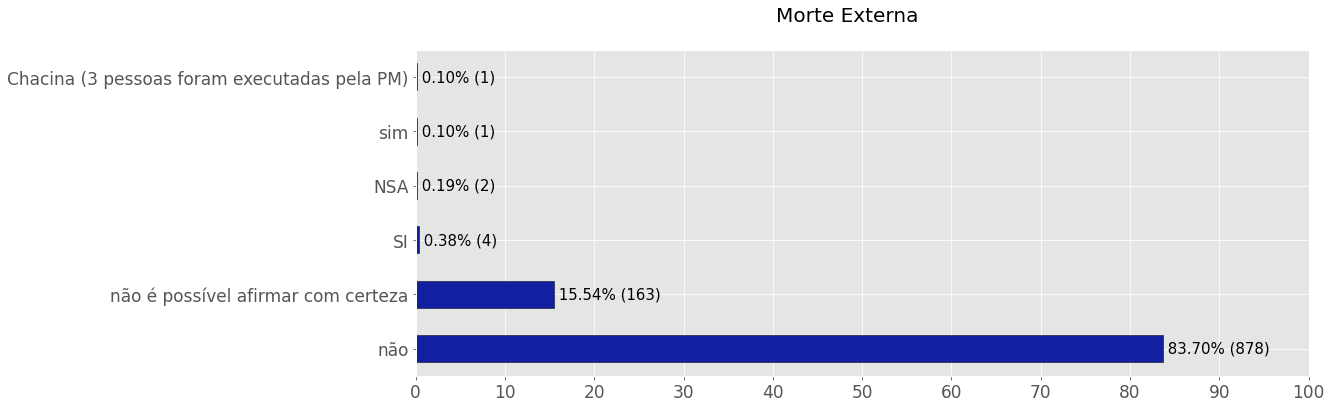

In [85]:
plot, fig = gera_grafico_geral("59 - A morte ocorreu durante um massacre?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

# loc_geral_variavel_59_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_morte_durante_massacre_caso_externa.png"
# fig.savefig(loc_geral_variavel_59_2_6)

### 61 - Houve investigação da morte?

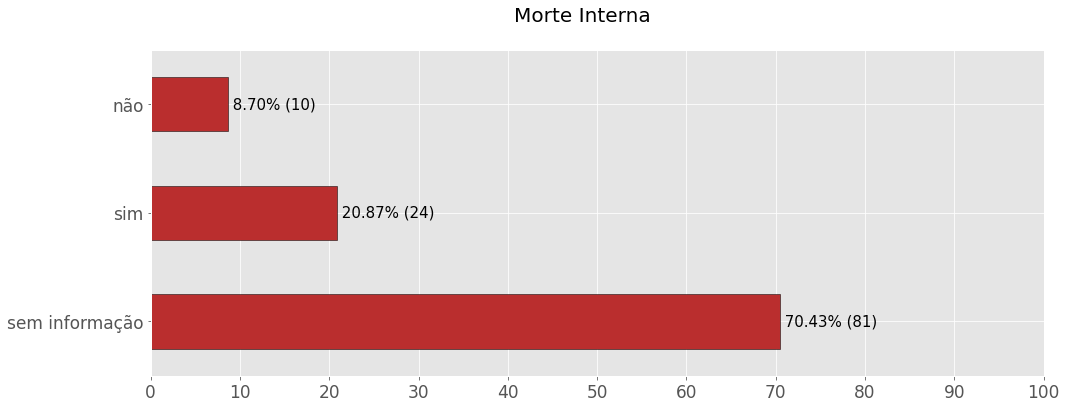

In [ ]:
plot, fig = gera_grafico_geral("61 - Houve investigação da morte?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

loc_geral_variavel_61_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_houve_investigacao_morte_caso_interna.png"
fig.savefig(loc_geral_variavel_61_1_6)

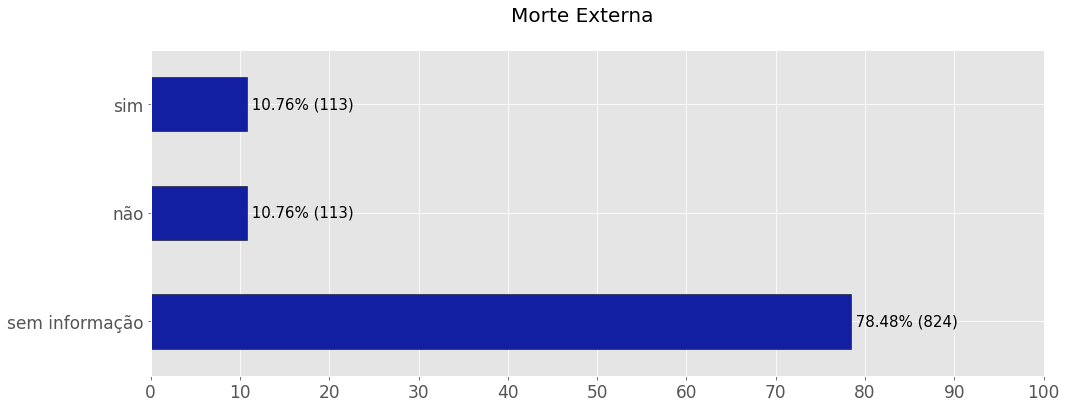

In [ ]:
plot, fig = gera_grafico_geral("61 - Houve investigação da morte?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

loc_geral_variavel_61_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_houve_investigacao_morte_caso_externa.png"
fig.savefig(loc_geral_variavel_61_2_6)

### 68 - Houve perícia?

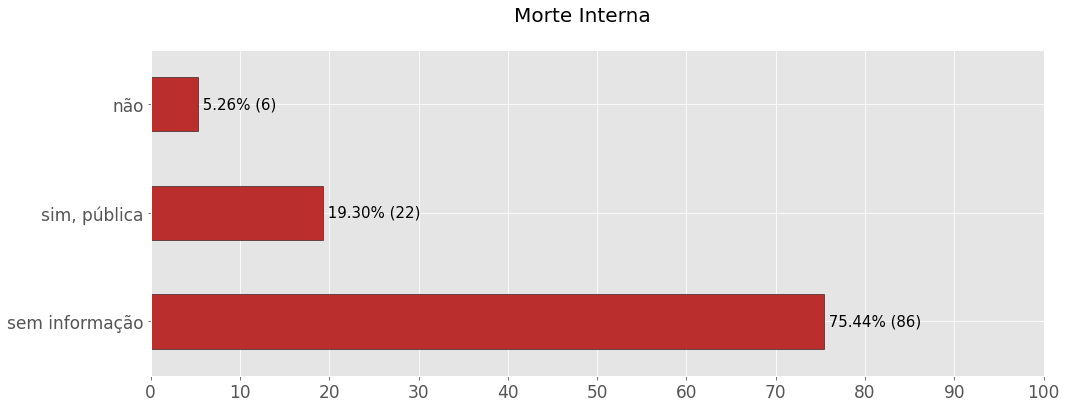

In [ ]:
plot, fig = gera_grafico_geral("68 - Houve perícia?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

loc_geral_variavel_68_1_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_houve_pericia_caso_interna.png"
fig.savefig(loc_geral_variavel_68_1_6)

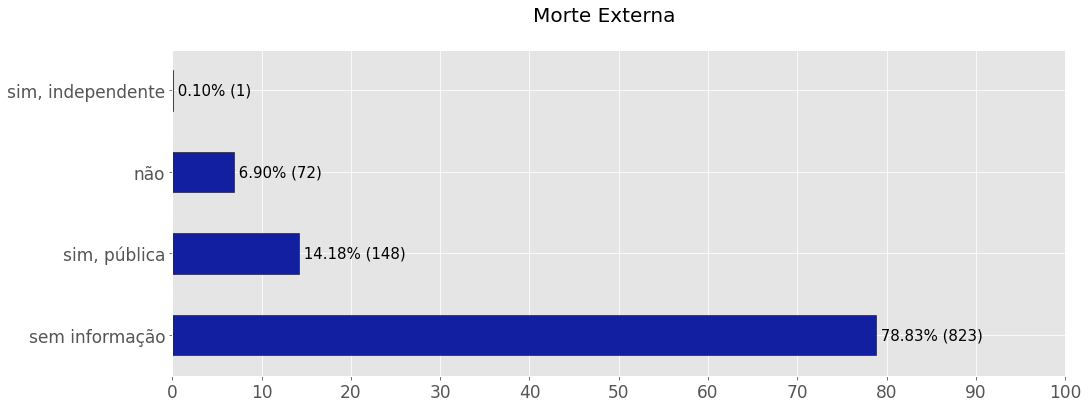

In [ ]:
plot, fig = gera_grafico_geral("68 - Houve perícia?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

loc_geral_variavel_68_2_6 = "/content/drive/My Drive/codigos_colab/imagens_graficos/6/grafico_houve_pericia_caso_externa.png"
fig.savefig(loc_geral_variavel_68_2_6)

### 47 - Responsável pela emissão da Declaração de Óbito (D.O.) ou Atestado de Óbito (codificada)

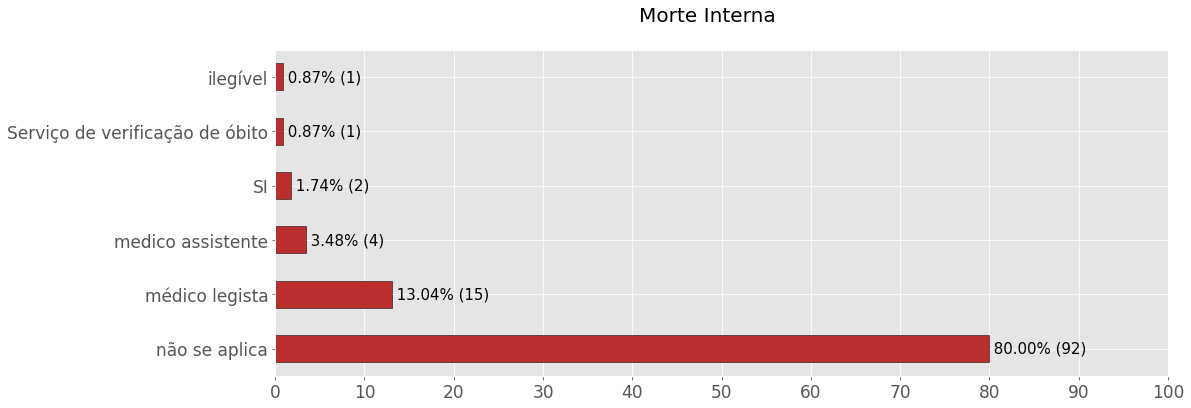

In [86]:
plot, fig = gera_grafico_geral("47- codificada", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

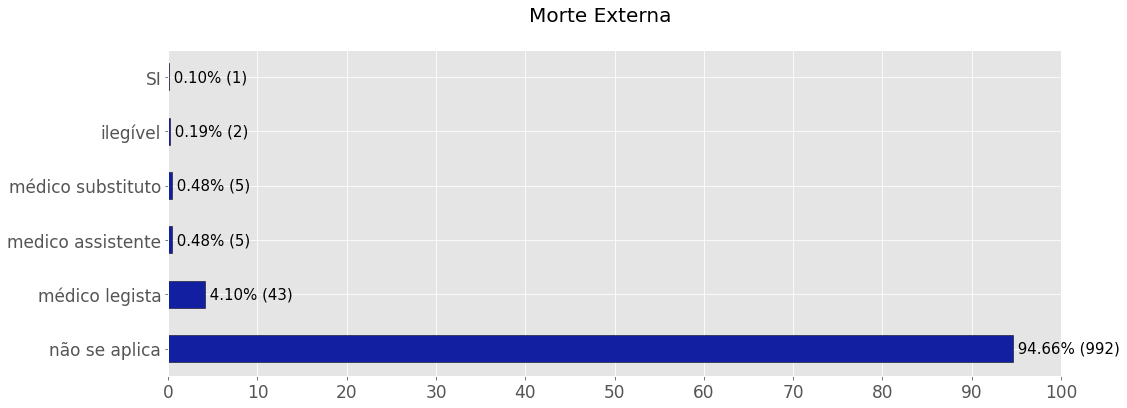

In [87]:
plot, fig = gera_grafico_geral("47- codificada", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

In [88]:
# dict_infos = {'sem informação': 0, 'com informação': 0}
# for j in planilha_filtrada_interna['47- codificada']:
#   if pd.isnull(j) or str(j).lower() == "nsa":
#     continue
  
#   if strip_accents(str(j)).lower().strip() == "si" or strip_accents(str(j)).lower().strip() == "ilegivel" or j is None:
#     dict_infos['sem informação'] += 1
#   else:
#     dict_infos['com informação'] += 1
# # print(dict_infos)

# df_dict_infos = pd.DataFrame.from_dict([dict_infos])
# df_dict_infos.rename(index = {0: "quantidade"}, inplace = True)
# # print(df_dict_infos)
# df_dict_infos = df_dict_infos.T
# # print(df_dict_infos)
# df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


# plt.style.use(['ggplot'])
# fig, ax = plt.subplots(figsize=(20,7))
# fig.suptitle("Dados Faltantes - Responsável pela emissão da Declaração de Óbito codificada - Morte Interna", fontsize=24)
# df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#ba2e2e'], fontsize=15, edgecolor="black")
# ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# # plt.ylabel(None)
# plt.xticks(range(0, 110, 10))

In [89]:
# dict_infos = {'sem informação': 0, 'com informação': 0}
# for j in planilha_filtrada_externa['47- codificada']:
#   if pd.isnull(j) or str(j).lower() == "nsa":
#     continue
  
#   if strip_accents(str(j)).lower().strip() == "si" or strip_accents(str(j)).lower().strip() == "ilegivel" or j is None:
#     dict_infos['sem informação'] += 1
#   else:
#     dict_infos['com informação'] += 1
# # print(dict_infos)

# df_dict_infos = pd.DataFrame.from_dict([dict_infos])
# df_dict_infos.rename(index = {0: "quantidade"}, inplace = True)
# # print(df_dict_infos)
# df_dict_infos = df_dict_infos.T
# # print(df_dict_infos)
# df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


# plt.style.use(['ggplot'])
# fig, ax = plt.subplots(figsize=(20,7))
# fig.suptitle("Dados Faltantes - Responsável pela emissão da Declaração de Óbito codificada - Morte Interna", fontsize=24)
# df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#121fa1'], fontsize=15, edgecolor="black")
# ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# # plt.ylabel(None)
# plt.xticks(range(0, 110, 10))

### 70 - Qual foi o motivo de requisição da perícia (codificada)


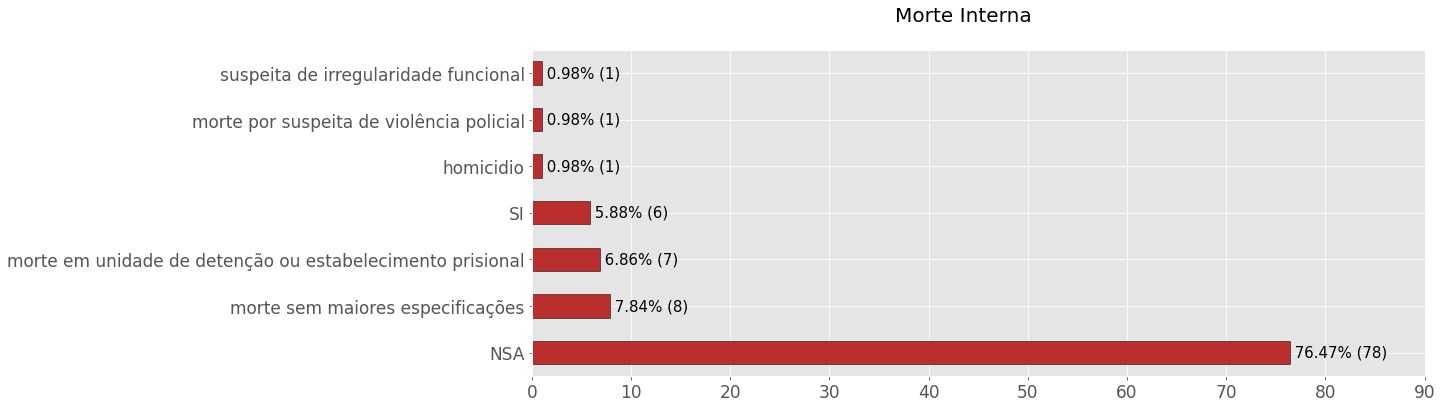

In [93]:
plot, fig = gera_grafico_geral("70- codificada", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 100, 10))

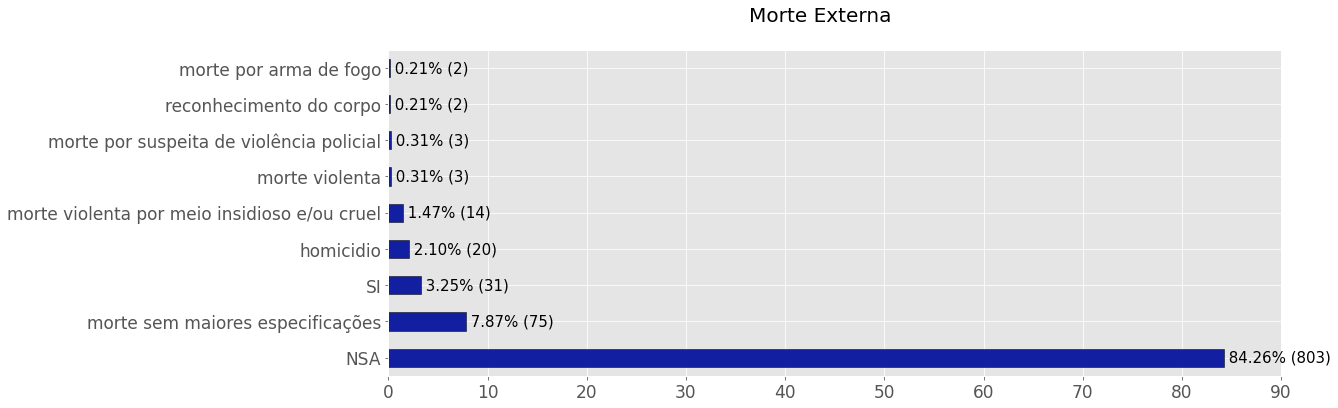

In [94]:
plot, fig = gera_grafico_geral("70- codificada", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 100, 10))

In [90]:
# dict_infos = {'sem informação': 0, 'com informação': 0}
# for j in planilha_filtrada_interna['70- codificada']:
#   if pd.isnull(j) or str(j).lower() == "nsa":
#     continue
  
#   if strip_accents(str(j)).lower().strip() == "si" or j is None:
#     dict_infos['sem informação'] += 1
#   else:
#     dict_infos['com informação'] += 1
# # print(dict_infos)

# df_dict_infos = pd.DataFrame.from_dict([dict_infos])
# df_dict_infos.rename(index = {0: "quantidade"}, inplace = True)
# # print(df_dict_infos)
# df_dict_infos = df_dict_infos.T
# # print(df_dict_infos)
# df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


# plt.style.use(['ggplot'])
# fig, ax = plt.subplots(figsize=(20,7))
# fig.suptitle("Dados Faltantes - Motivo Perícia codificada - Morte Interna", fontsize=24)
# df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#ba2e2e'], fontsize=15, edgecolor="black")
# ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# # plt.ylabel(None)
# plt.xticks(range(0, 110, 10))

In [95]:
# dict_infos = {'sem informação': 0, 'com informação': 0}
# for j in planilha_filtrada_externa['70- codificada']:
#   if pd.isnull(j) or str(j).lower() == "nsa":
#     continue
  
#   if strip_accents(str(j)).lower().strip() == "si" or j is None:
#     dict_infos['sem informação'] += 1
#   else:
#     dict_infos['com informação'] += 1
# # print(dict_infos)

# df_dict_infos = pd.DataFrame.from_dict([dict_infos])
# df_dict_infos.rename(index = {0: "quantidade"}, inplace = True)
# # print(df_dict_infos)
# df_dict_infos = df_dict_infos.T
# # print(df_dict_infos)
# df_dict_infos['porcentagem'] = df_dict_infos['quantidade']/df_dict_infos['quantidade'].sum()*100


# plt.style.use(['ggplot'])
# fig, ax = plt.subplots(figsize=(20,7))
# fig.suptitle("Dados Faltantes - Motivo Perícia codificada - Morte Externa", fontsize=24)
# df_dict_infos['porcentagem'].plot(ax=ax, kind='barh', color=['#121fa1'], fontsize=15, edgecolor="black")
# ax.bar_label(ax.containers[0], labels=combine(df_dict_infos['quantidade'],df_dict_infos['porcentagem']), fontsize=15)
# # plt.ylabel(None)
# plt.xticks(range(0, 110, 10))

### 72 - Houve mudança na causa da morte, com juntada de certidão de óbito alterada?


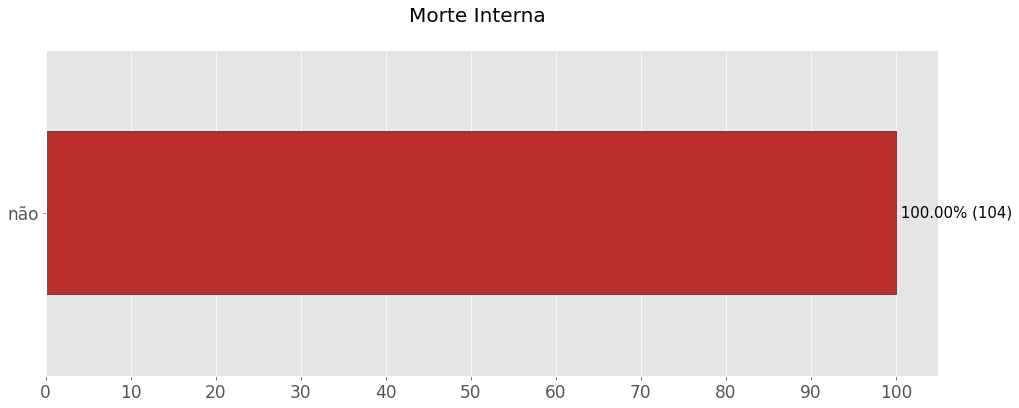

In [96]:
plot, fig = gera_grafico_geral("72 - Houve mudança na causa da morte, com juntada de certidão de óbito alterada?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

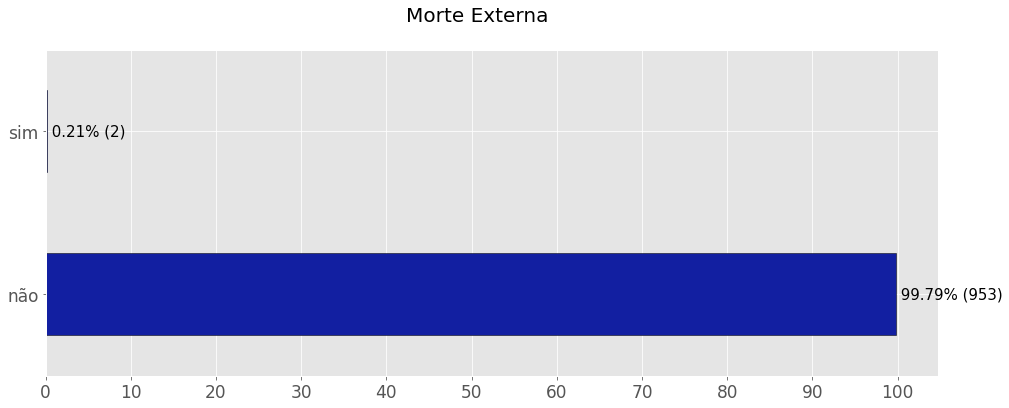

In [97]:
plot, fig = gera_grafico_geral("72 - Houve mudança na causa da morte, com juntada de certidão de óbito alterada?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

### 73 - Explicação sobre mudança de causa da morte (codificada)


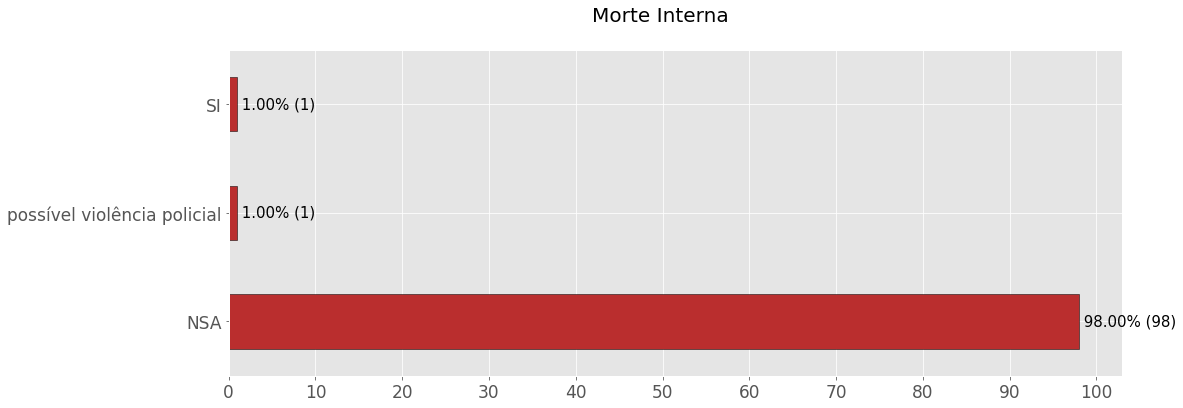

In [98]:
plot, fig = gera_grafico_geral("73 - codificada", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

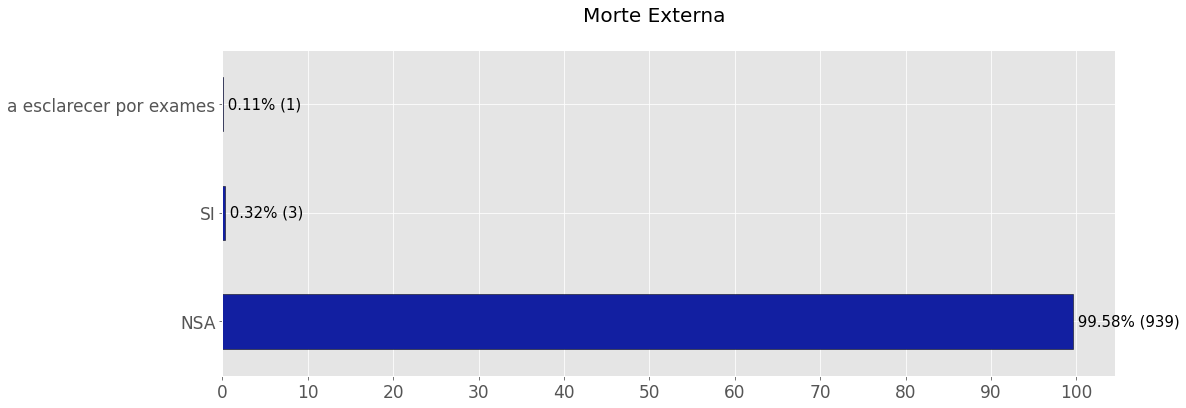

In [99]:
plot, fig = gera_grafico_geral("73 - codificada", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))


### 75 - Identificação racial ao fim do processo


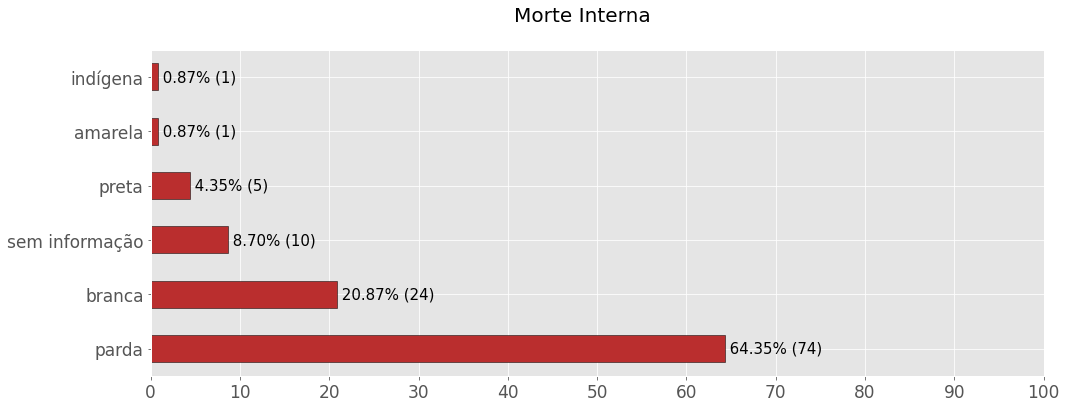

In [ ]:
plot, fig = gera_grafico_geral("75 - Identificação racial ao fim do processo", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

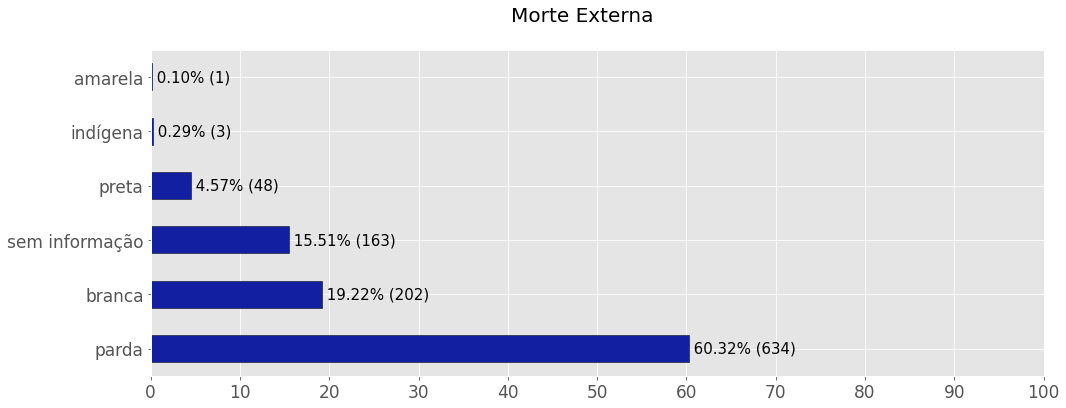

In [ ]:
plot, fig = gera_grafico_geral("75 - Identificação racial ao fim do processo", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

### 42 - Quem informou a morte no processo judicial ou no inquérito policial ?(codificada)


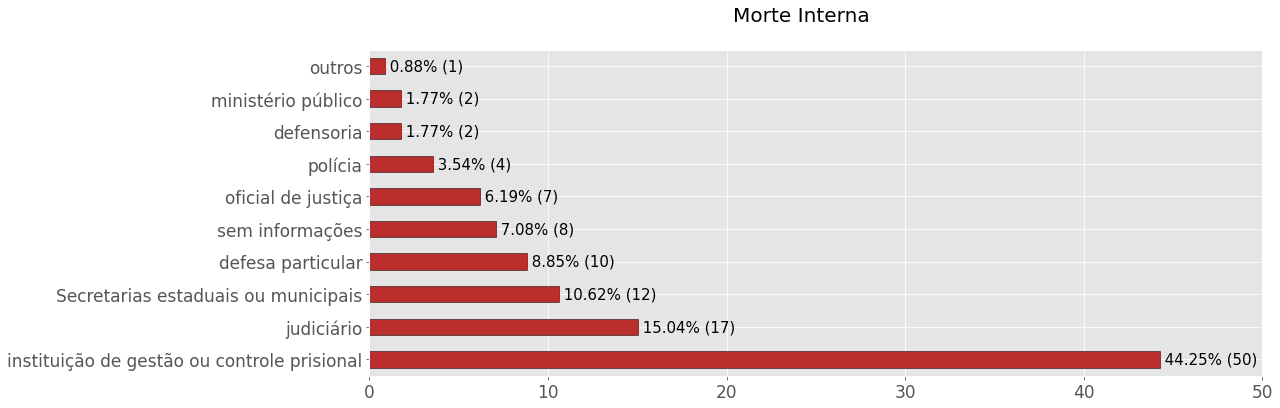

In [102]:
plot, fig = gera_grafico_geral("42 - codificada", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 60, 10))

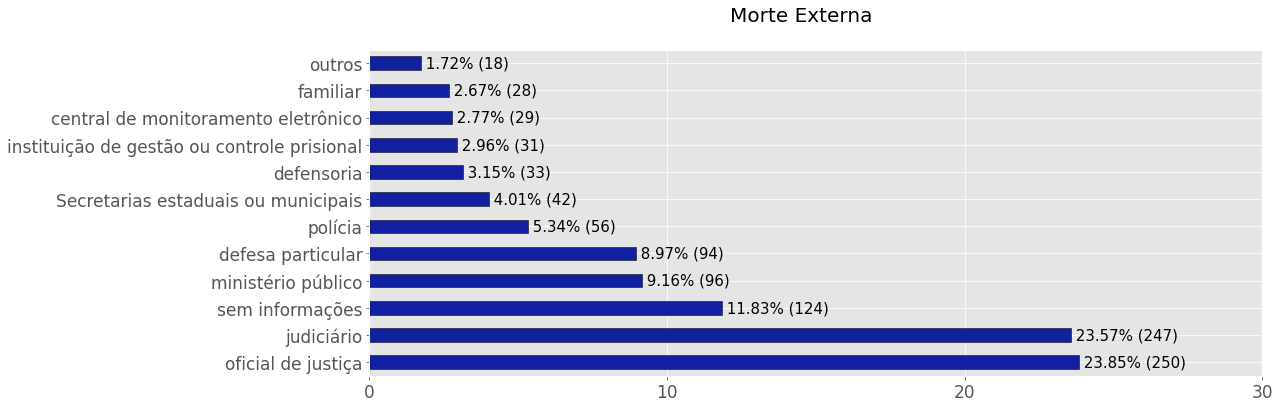

In [105]:
plot, fig = gera_grafico_geral("42 - codificada", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 40, 10))

### 64 - Responsável por iniciar o procedimento investigativo (codificada)


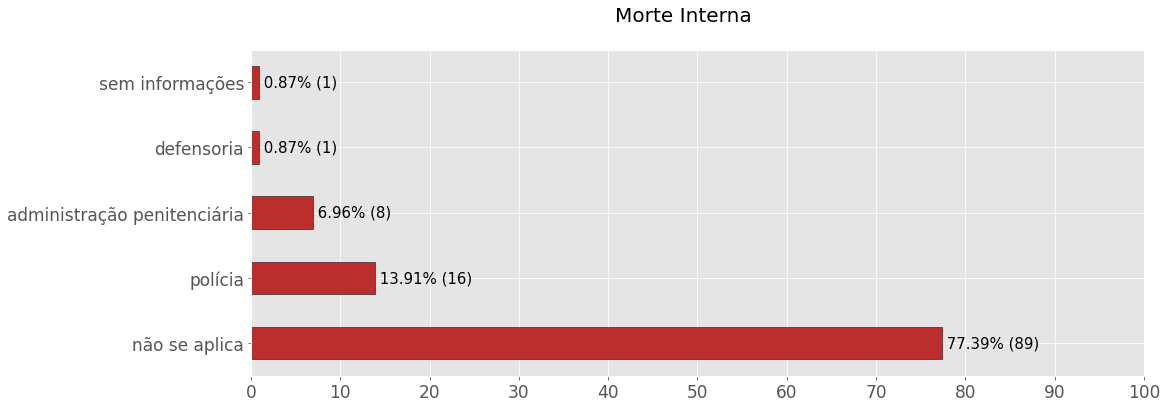

In [109]:
plot, fig = gera_grafico_geral("64 - codificada", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

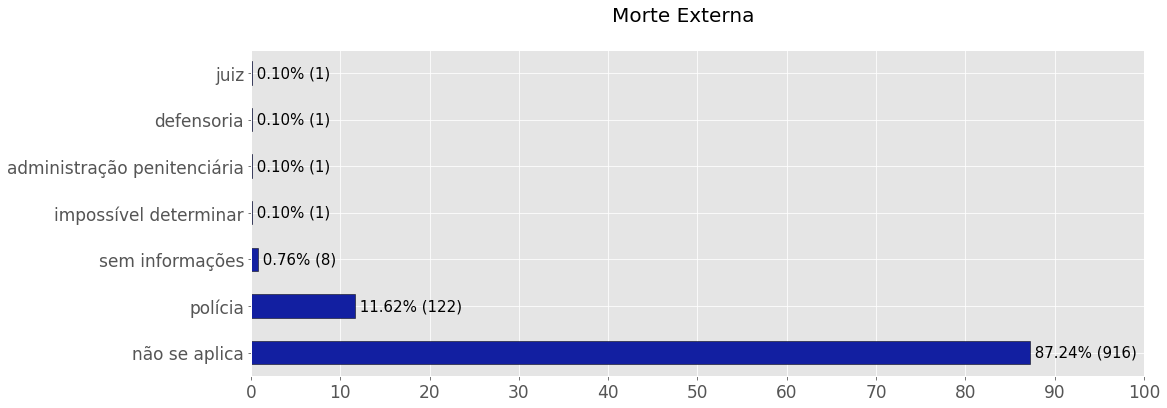

In [111]:
plot, fig = gera_grafico_geral("64 - codificada", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

### 8 - Quantas pessoas que respondiam ao processo faleceram (considerando as informações do processo)?

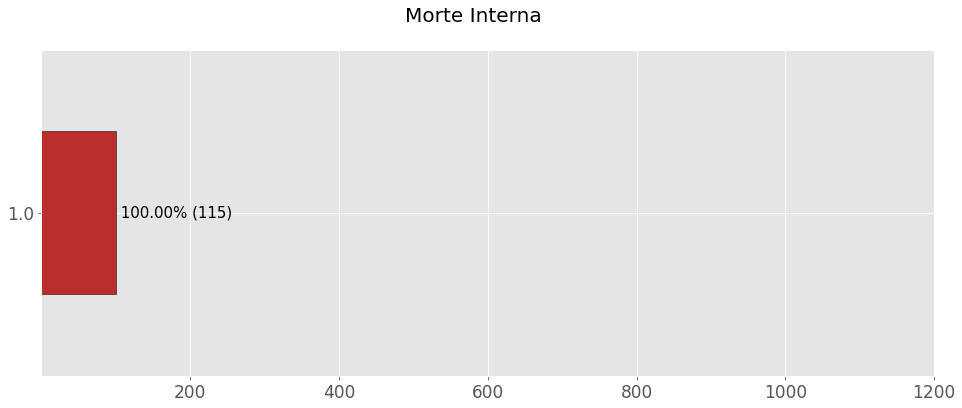

In [117]:
plot, fig = gera_grafico_geral("8 - Quantas pessoas que respondiam ao processo faleceram (considerando as informações do processo)?", planilha_filtrada_interna, "Morte Interna", x=16, y=6)

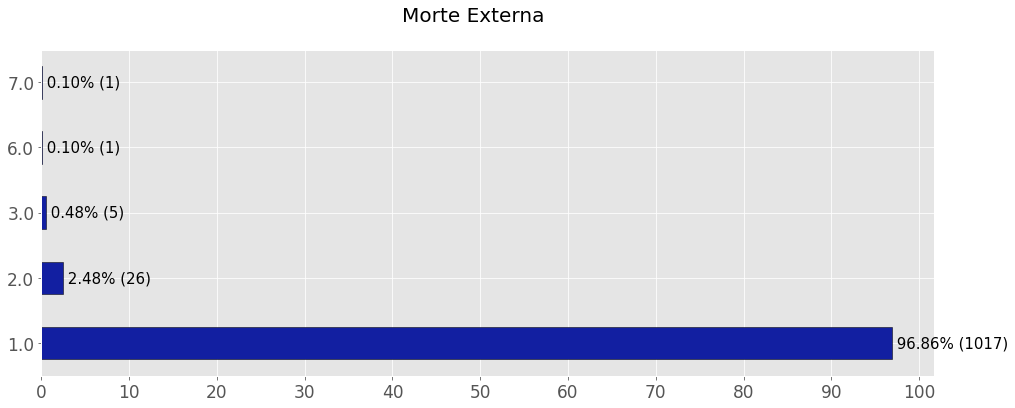

In [118]:
plot, fig = gera_grafico_geral("8 - Quantas pessoas que respondiam ao processo faleceram (considerando as informações do processo)?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))



### 7 - Quantas pessoas estão respondendo pelo mesmo processo?


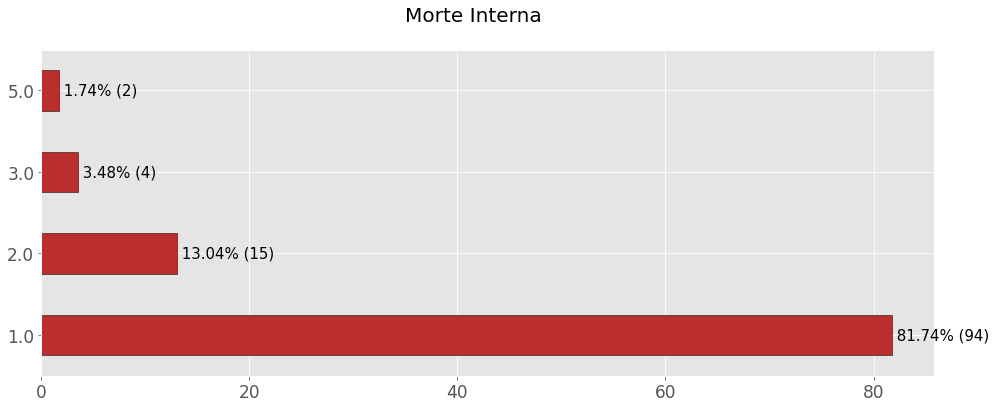

In [143]:
plot, fig = gera_grafico_geral("7 - Quantas pessoas estão respondendo pelo mesmo processo?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 100, 20))

       quantidade  percentual
index                        
1.0           796       75.88
2.0           160       15.25
3.0            41        3.91
4.0            26        2.48
5.0            10        0.95
6.0             3        0.29
7.0             5        0.48
8.0             1        0.10
9.0             2        0.19
13.0            2        0.19
17.0            1        0.10
21.0            1        0.10
69.0            1        0.10


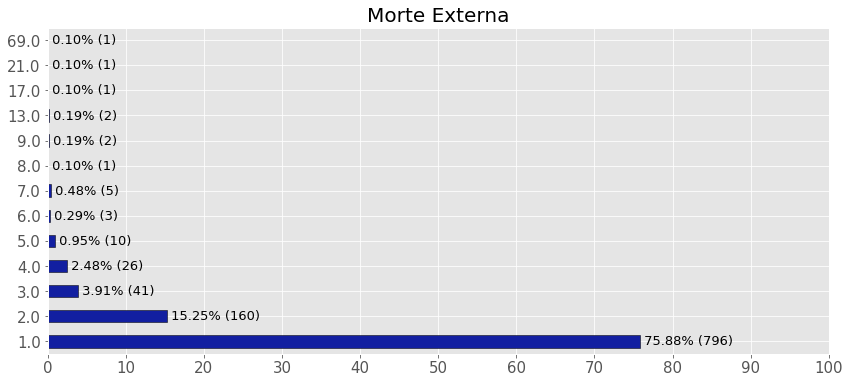

In [149]:
# plot, fig = gera_grafico_geral("7 - Quantas pessoas estão respondendo pelo mesmo processo?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

def combine(counts, percentages):
    fmt = ' {:.2f}% ({})'.format
    return [fmt(p, c) for c, p in zip(counts, percentages)]


var_27_aux_faixas_renda_externa = planilha_filtrada_externa['7 - Quantas pessoas estão respondendo pelo mesmo processo?'].value_counts().to_frame()
# print(var_27_aux_faixas_renda_externa)

var_27_aux_faixas_renda_externa.rename(columns = {"7 - Quantas pessoas estão respondendo pelo mesmo processo?": "quantidade"}, inplace = True)

# print(var_27_aux_faixas_renda_externa)

# print(var_27_aux_faixas_renda_externa["quantidade"].sum())
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reset_index()

var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reindex([0,1,2,3,4,6,5,10,7,8,12,11,9])
var_27_aux_faixas_renda_externa.set_index('index', inplace=True)



# geral_absolute = planilha_filtrada[variavel].value_counts()
geral_absolute = var_27_aux_faixas_renda_externa["quantidade"]
tot = var_27_aux_faixas_renda_externa["quantidade"].sum()
var_27_aux_faixas_renda_externa["percentual"] = round((var_27_aux_faixas_renda_externa["quantidade"]*100)/tot, 2)
# var_27_aux_faixas_renda_externa["percentual"] = var_27_aux_faixas_renda_externa["percentual"].astype(str)+"%"
geral_relative = var_27_aux_faixas_renda_externa["percentual"]

print(var_27_aux_faixas_renda_externa)

# labels_value_counts_renda_morte_externa = 
# print(labels_value_counts_renda_morte_externa)

plt.style.use(['ggplot'])
if geral_relative.size != 0:
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(14,6))
  ax.set_title("Morte Externa", fontsize=20)
  var_27_aux_faixas_renda_externa['percentual'].plot(ax=ax, kind='barh', color=["#121fa1"], fontsize=15, edgecolor="black")
  ax.bar_label(ax.containers[0], labels=combine(geral_absolute,geral_relative), fontsize=13)
  plt.xticks(range(0,110,10))
  plt.ylabel(None)

### 62 - Tipo de procedimento instaurado para investigar a morte


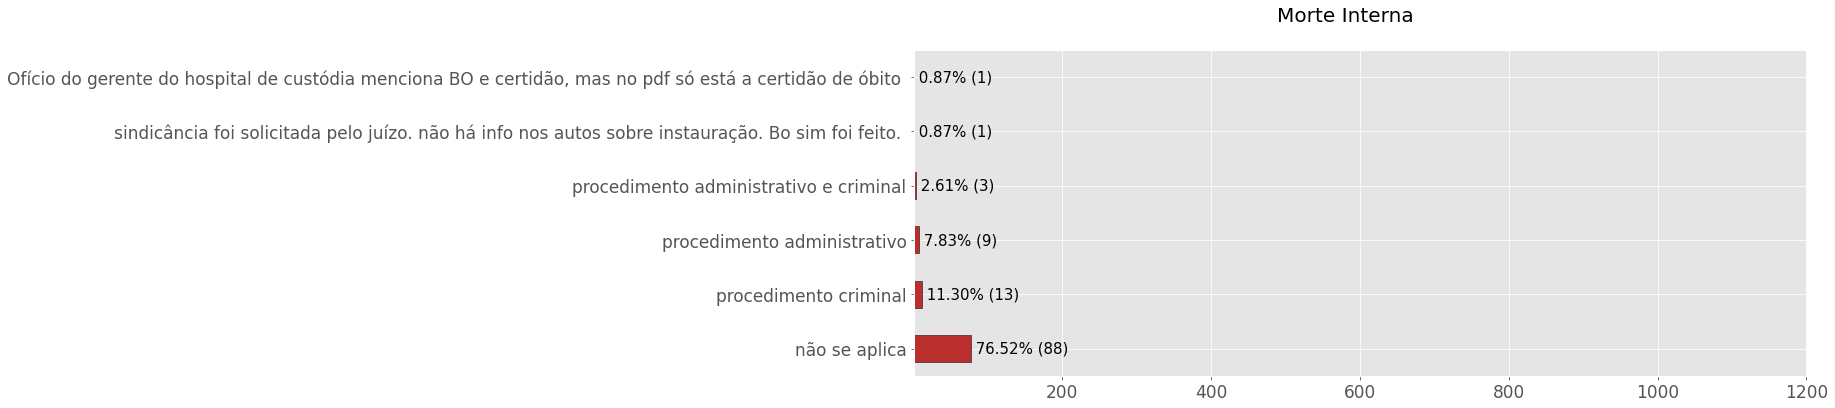

In [122]:
plot, fig = gera_grafico_geral("62 - Tipo de procedimento instaurado para investigar a morte", planilha_filtrada_interna, "Morte Interna", x=16, y=6)

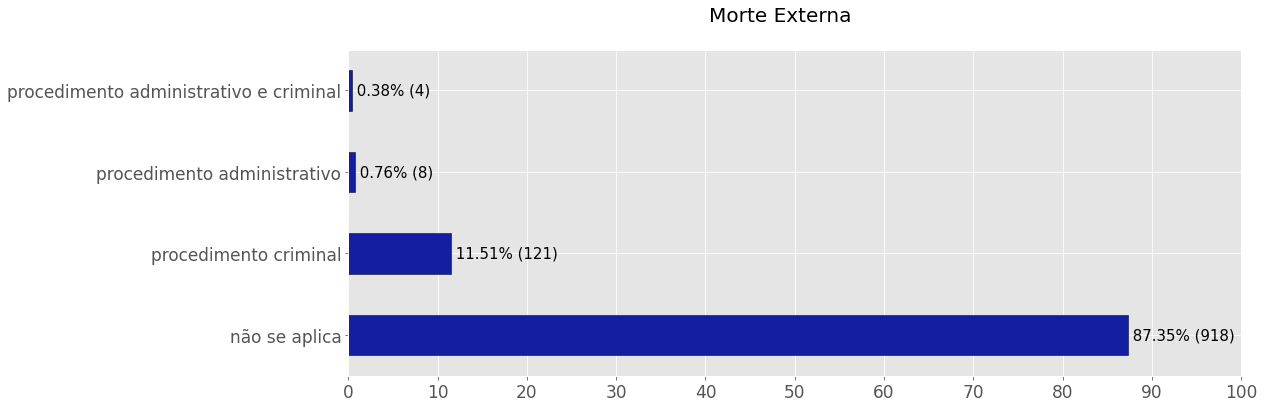

In [121]:
plot, fig = gera_grafico_geral("62 - Tipo de procedimento instaurado para investigar a morte", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

### 69 - Quem requisitou a perícia?


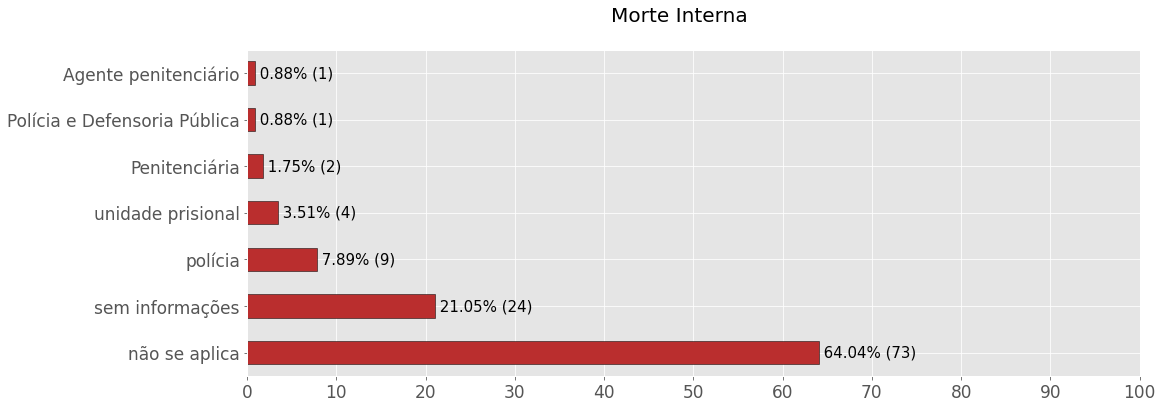

In [152]:
plot, fig = gera_grafico_geral("69 - Quem requisitou a perícia?", planilha_filtrada_interna, "Morte Interna", x=16, y=6, eixo_y=(0, 110, 10))

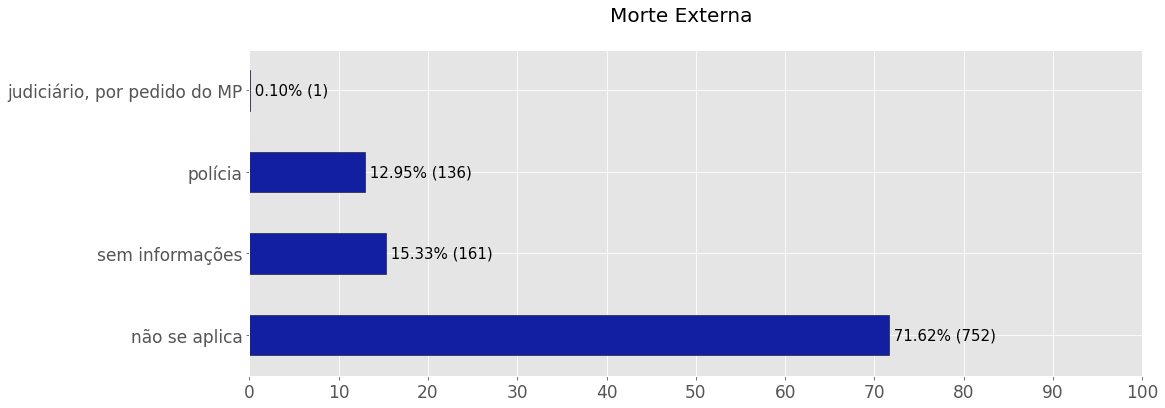

In [153]:
plot, fig = gera_grafico_geral("69 - Quem requisitou a perícia?", planilha_filtrada_externa, "Morte Externa", cor="#121fa1", x=16, y=6, eixo_y=(0, 110, 10))

## Template

In [ ]:
## essa parte pega o template na pasta e usando o método DocxTemplate() salvamos o template dentro da variável documento

arq_template = "/content/drive/My Drive/codigos_colab/template_tarefa_2.docx" # esse template está na pasta
documento = DocxTemplate(arq_template)

In [ ]:
## aqui vc tem que colocar todos os gráficos

# imagem = InlineImage(template onde a imagem deve ser inserida, imagem a ser inserida, tamanho da imagem a ser inserida)

# gráficos parte 6
grafico_variavel_duracao_processo_1_6 = InlineImage(documento, loc_geral_variavel_duracao_processo_1_6, Cm(16))
grafico_variavel_duracao_processo_2_6 = InlineImage(documento, loc_geral_variavel_duracao_processo_2_6, Cm(16))
grafico_variavel_tempo_investigacao_morte_1_6 = InlineImage(documento, loc_geral_variavel_tempo_investigacao_morte_1_6, Cm(16))
grafico_variavel_tempo_investigacao_morte_2_6 = InlineImage(documento, loc_geral_variavel_tempo_investigacao_morte_2_6, Cm(16))
grafico_variavel_tempo_informar_morte_processo_1_6 = InlineImage(documento, loc_geral_variavel_tempo_informar_morte_processo_1_6, Cm(16))
grafico_variavel_tempo_informar_morte_processo_2_6 = InlineImage(documento, loc_geral_variavel_tempo_informar_morte_processo_2_6, Cm(16))
grafico_variavel_tempo_declaracao_extincao_punibilidade_1_6 = InlineImage(documento, loc_geral_variavel_tempo_declaracao_extincao_punibilidade_1_6, Cm(16))
grafico_variavel_tempo_declaracao_extincao_punibilidade_2_6 = InlineImage(documento, loc_geral_variavel_tempo_declaracao_extincao_punibilidade_2_6, Cm(16))
grafico_variavel_qtd_docs_1_6 = InlineImage(documento, loc_geral_variavel_qtd_docs_1_6, Cm(16))
grafico_variavel_qtd_docs_2_6 = InlineImage(documento, loc_geral_variavel_qtd_docs_2_6, Cm(16))
grafico_variavel_46_1_6 = InlineImage(documento, loc_geral_variavel_46_1_6, Cm(16))
grafico_variavel_46_2_6 = InlineImage(documento, loc_geral_variavel_46_2_6, Cm(16))
grafico_variavel_48_1_6 = InlineImage(documento, loc_geral_variavel_48_1_6, Cm(16))
grafico_variavel_48_2_6 = InlineImage(documento, loc_geral_variavel_48_2_6, Cm(16))
grafico_variavel_53_1_6 = InlineImage(documento, loc_geral_variavel_53_1_6, Cm(16))
grafico_variavel_53_2_6 = InlineImage(documento, loc_geral_variavel_53_2_6, Cm(16))
grafico_variavel_57_1_6 = InlineImage(documento, loc_geral_variavel_57_1_6, Cm(16))
grafico_variavel_57_2_6 = InlineImage(documento, loc_geral_variavel_57_2_6, Cm(16))
grafico_variavel_58_1_6 = InlineImage(documento, loc_geral_variavel_58_1_6, Cm(16))
grafico_variavel_58_2_6 = InlineImage(documento, loc_geral_variavel_58_2_6, Cm(16))
grafico_variavel_59_1_6 = InlineImage(documento, loc_geral_variavel_59_1_6, Cm(16))
grafico_variavel_59_2_6 = InlineImage(documento, loc_geral_variavel_59_2_6, Cm(16))
grafico_variavel_61_1_6 = InlineImage(documento, loc_geral_variavel_61_1_6, Cm(16))
grafico_variavel_61_2_6 = InlineImage(documento, loc_geral_variavel_61_2_6, Cm(16))
grafico_variavel_68_1_6 = InlineImage(documento, loc_geral_variavel_68_1_6, Cm(16))
grafico_variavel_68_2_6 = InlineImage(documento, loc_geral_variavel_68_2_6, Cm(16))

In [ ]:
contexto = {
    'variavel_duracao_processo_1_6': grafico_variavel_duracao_processo_1_6,
    'variavel_duracao_processo_2_6': grafico_variavel_duracao_processo_2_6,
    'variavel_tempo_investigacao_morte_1_6': grafico_variavel_tempo_investigacao_morte_1_6,
    'variavel_tempo_investigacao_morte_2_6': grafico_variavel_tempo_investigacao_morte_2_6,
    'variavel_tempo_informar_morte_processo_1_6': grafico_variavel_tempo_informar_morte_processo_1_6,
    'variavel_tempo_informar_morte_processo_2_6': grafico_variavel_tempo_informar_morte_processo_2_6,
    'variavel_declaracao_extincao_punibilidade_1_6': grafico_variavel_tempo_declaracao_extincao_punibilidade_1_6,
    'variavel_declaracao_extincao_punibilidade_2_6': grafico_variavel_tempo_declaracao_extincao_punibilidade_2_6,
    'variavel_qtd_documentos_1_6': grafico_variavel_qtd_docs_1_6,
    'variavel_qtd_documentos_2_6': grafico_variavel_qtd_docs_2_6,
    'variavel_46_grafico_1_6': grafico_variavel_46_1_6,
    'variavel_46_grafico_2_6': grafico_variavel_46_2_6,
    'variavel_48_grafico_1_6': grafico_variavel_48_1_6,
    'variavel_48_grafico_2_6': grafico_variavel_48_2_6,
    'variavel_53_grafico_1_6': grafico_variavel_53_1_6,
    'variavel_53_grafico_2_6': grafico_variavel_53_2_6,
    'variavel_57_grafico_1_6': grafico_variavel_57_1_6,
    'variavel_57_grafico_2_6': grafico_variavel_57_2_6,
    'variavel_58_grafico_1_6': grafico_variavel_58_1_6,
    'variavel_58_grafico_2_6': grafico_variavel_58_2_6,
    'variavel_59_grafico_1_6': grafico_variavel_59_1_6,
    'variavel_59_grafico_2_6': grafico_variavel_59_2_6,
    'variavel_61_grafico_1_6': grafico_variavel_61_1_6,
    'variavel_61_grafico_2_6': grafico_variavel_61_2_6,
    'variavel_68_grafico_1_6': grafico_variavel_68_1_6,
    'variavel_68_grafico_2_6': grafico_variavel_68_2_6

}

In [ ]:
# Geramos o documento, substituindo as variaveis do template pelos valores do contexto
documento.render(contexto)

# Salvamos o documento que era o template com os gráficos inseridos
documento.save("/content/drive/My Drive/codigos_colab/relatorio_final.docx")